# Feature Detection and Description:

Edge detection
Corner detection
Blob detection
Scale-invariant feature detection
Descriptor extraction

Feature detection and description are fundamental tasks in computer vision, enabling applications like object recognition, image stitching, and 3D reconstruction. Here's an overview of each aspect you mentioned:

### 1. Edge Detection:
Edge detection aims to identify points in an image where the brightness changes sharply, defining boundaries between different objects or regions. Common edge detection algorithms include:

- **Sobel Operator**: Computes the gradient magnitude to detect edges.
- **Canny Edge Detector**: Multi-stage algorithm that detects edges with low error rates.

### 2. Corner Detection:
Corner detection identifies points where the intensity of the image changes in multiple directions. Corners are useful as they provide distinctive features for matching. Popular corner detection methods include:

- **Harris Corner Detector**: Computes the Harris corner response function to detect corners.
- **Shi-Tomasi Corner Detector**: Similar to the Harris detector but uses a different corner response function.

### 3. Blob Detection:
Blob detection identifies regions in an image that differ in properties such as brightness, color, or texture from the surrounding regions. Blobs are useful for tasks like object tracking and image segmentation. Common blob detection algorithms include:

- **Laplacian of Gaussian (LoG)**: Applies the Laplacian operator to the Gaussian-smoothed image to detect blobs.
- **Difference of Gaussians (DoG)**: Approximates LoG by subtracting two Gaussian-blurred images.

### 4. Scale-Invariant Feature Detection:
Scale-invariant feature detection aims to detect keypoints that are invariant to scale changes in the image. This is crucial for matching features across images taken from different viewpoints or scales. Popular algorithms include:

- **Scale-Invariant Feature Transform (SIFT)**: Detects keypoints at multiple scales and orientations using scale-space extrema detection and keypoint localization.
- **Speeded-Up Robust Features (SURF)**: Approximates SIFT with a faster algorithm using integral images and box filters.

### 5. Descriptor Extraction:
Once keypoints are detected, descriptors are computed to describe the local image region around each keypoint. Descriptors encode information about the appearance and gradient distribution of the region, enabling feature matching. Common descriptors include:

- **Histogram of Oriented Gradients (HOG)**: Represents the distribution of gradient orientations in a local image patch.
- **Scale-Invariant Feature Transform (SIFT) Descriptor**: Represents the gradient orientation histogram of the local region around a keypoint.

Equations and detailed information for each algorithm can be found in academic papers, textbooks, or online resources specific to each method. Implementations are often available in libraries like OpenCV, making it easier to use these techniques in practice.

In [1]:
import cv2
import numpy as np

def edge_detection(image, min_threshold=100, max_threshold=200):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply Canny edge detector
    edges = cv2.Canny(blurred, min_threshold, max_threshold)
    
    return edges

# Read input image
image = cv2.imread('My.jpg')

# Apply edge detection
edges = edge_detection(image)

# Display the original image and the edges
cv2.imshow('Original Image', image)
cv2.imshow('Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
import cv2
import numpy as np

def harris_corner_detection(image, threshold=0.01):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute gradients using Sobel operator
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    
    # Compute components of the Harris matrix
    Ixx = sobelx**2
    Ixy = sobelx * sobely
    Iyy = sobely**2
    
    # Apply Gaussian blur to the components
    Ixx = cv2.GaussianBlur(Ixx, (5, 5), 0)
    Ixy = cv2.GaussianBlur(Ixy, (5, 5), 0)
    Iyy = cv2.GaussianBlur(Iyy, (5, 5), 0)
    
    # Compute Harris response function
    det = Ixx * Iyy - Ixy**2
    trace = Ixx + Iyy
    harris_response = det - 0.04 * trace**2
    
    # Threshold the Harris response to find corners
    corners = np.zeros_like(image)
    corners[harris_response > threshold * harris_response.max()] = [0, 0, 255]  # Mark detected corners in red
    
    return corners

# Read input image
image = cv2.imread('My.jpg')

# Apply Harris corner detection
detected_corners = harris_corner_detection(image)

# Display the original image and detected corners
cv2.imshow('Original Image', image)
cv2.imshow('Detected Corners', detected_corners)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
import cv2
import numpy as np

def blob_detection(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Difference of Gaussians (DoG) to detect blobs
    blobs = cv2.GaussianBlur(gray, (5, 5), 0) - cv2.GaussianBlur(gray, (9, 9), 0)
    
    # Thresholding to obtain binary image
    _, blobs = cv2.threshold(blobs, 50, 255, cv2.THRESH_BINARY)
    
    # Convert binary image to color for visualization
    blobs_color = cv2.cvtColor(blobs, cv2.COLOR_GRAY2BGR)
    blobs_color[:,:,2] = 0  # Set blue and green channels to 0
    
    return blobs_color

# Read input image
image = cv2.imread('My.jpg')

# Apply blob detection
detected_blobs = blob_detection(image)

# Display the original image and detected blobs
cv2.imshow('Original Image', image)
cv2.imshow('Detected Blobs', detected_blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
import cv2

# Load an image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
cv2.imshow('Image with Keypoints', image_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
import cv2

# Load an image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize HOG descriptor
hog = cv2.HOGDescriptor()

# Compute HOG descriptors
hog_descriptors = hog.compute(image)

# Display the HOG descriptors
print("HOG Descriptors Shape:", hog_descriptors.shape)

# Initialize SIFT descriptor
sift = cv2.SIFT_create()

# Detect keypoints using SIFT
keypoints = sift.detect(image)

# Compute SIFT descriptors
keypoints, sift_descriptors = sift.compute(image, keypoints)

# Display the SIFT descriptors
print("SIFT Descriptors Shape:", sift_descriptors.shape)


HOG Descriptors Shape: (105688800,)
SIFT Descriptors Shape: (13935, 128)


# Lists of all the topics in Feature Detection and Description in computer vision

Here's a list of some common topics in feature detection and description in computer vision:

1. **Corner Detection**:
   - Harris Corner Detection
   - Shi-Tomasi Corner Detection

2. **Blob Detection**:
   - Difference of Gaussians (DoG)
   - Determinant of Hessian (DoH)

3. **Edge Detection**:
   - Canny Edge Detection
   - Sobel Operator
   - Prewitt Operator
   - Roberts Cross Operator

4. **Scale-Invariant Feature Detection**:
   - Scale-Invariant Feature Transform (SIFT)
   - Speeded-Up Robust Features (SURF)
   - Oriented FAST and Rotated BRIEF (ORB)

5. **Descriptor Extraction**:
   - Histogram of Oriented Gradients (HOG)
   - SIFT Descriptor
   - SURF Descriptor
   - BRIEF Descriptor
   - ORB Descriptor

6. **Feature Matching**:
   - Brute-Force Matching
   - FLANN (Fast Library for Approximate Nearest Neighbors) Matching
   - RANSAC (Random Sample Consensus)

7. **Homography Estimation**:
   - Perspective Transform
   - Direct Linear Transform (DLT)
   - RANSAC-based Homography Estimation

8. **Keypoint Localization**:
   - DoG Keypoint Localization (for SIFT)
   - FAST Keypoint Detector

9. **Feature Tracking**:
   - KLT (Kanade-Lucas-Tomasi) Tracker
   - Lucas-Kanade Optical Flow

10. **Interest Point Detection**:
    - Maximally Stable Extremal Regions (MSER)
    - Harris-Laplace
    - FAST (Features from Accelerated Segment Test)

11. **Binary Descriptors**:
    - BRIEF (Binary Robust Independent Elementary Features)
    - BRISK (Binary Robust Invariant Scalable Keypoints)
    - FREAK (Fast Retina Keypoint)

12. **Local Binary Patterns (LBP)**:
    - Local Binary Patterns for Texture Description
    - Extended LBP (ELBP)
    - Uniform LBP

These topics cover a wide range of techniques used in feature detection, description, and matching, which are fundamental to many computer vision applications like object detection, recognition, and tracking.

# Corner Detection:

Harris Corner Detection
Shi-Tomasi Corner Detection

Corner detection is a fundamental task in computer vision that aims to identify points in an image where the intensity changes significantly in multiple directions. These points, known as corners or interest points, are crucial for various applications like object recognition, image stitching, and motion tracking. Two popular corner detection algorithms are Harris Corner Detection and Shi-Tomasi Corner Detection.

### Harris Corner Detection:

Harris Corner Detection, proposed by Chris Harris and Mike Stephens in 1988, is one of the earliest and most widely used corner detection algorithms. It measures the variation in intensity for a small window around each pixel and detects corners by looking for significant changes in intensity in all directions.

The Harris Corner Response function \( R \) for a pixel \( (x, y) \) is calculated as follows:

\[ R = \text{det}(M) - k \cdot \text{trace}^2(M) \]

Where \( M \) is the structure tensor (also known as the autocorrelation matrix), defined as:

\[ M = \sum_{x,y} w(x,y) \begin{bmatrix} I_x^2 & I_xI_y \\ I_xI_y & I_y^2 \end{bmatrix} \]

Here, \( I_x \) and \( I_y \) are the gradients in the \( x \) and \( y \) directions, respectively, and \( w(x, y) \) is a window function (e.g., Gaussian). The parameters \( k \) is an empirically determined constant typically set between 0.04 and 0.06.

After calculating the corner response \( R \) for each pixel, non-maximum suppression is performed to retain only local maxima as corner candidates. Finally, a threshold is applied to select prominent corners.

### Shi-Tomasi Corner Detection:

Shi-Tomasi Corner Detection is a modification of Harris Corner Detection proposed by J. Shi and C. Tomasi in 1994. It uses a different corner response function that is more robust and less sensitive to noise than the original Harris detector. Instead of directly using the corner response function, Shi-Tomasi calculates a score based on the minimum eigenvalue of the structure tensor.

The Shi-Tomasi score for a pixel \( (x, y) \) is given by:

\[ R = \min(\lambda_1, \lambda_2) \]

Where \( \lambda_1 \) and \( \lambda_2 \) are the eigenvalues of the structure tensor \( M \).

Unlike Harris Corner Detection, Shi-Tomasi Corner Detection does not require the empirically chosen parameter \( k \), making it more intuitive to use. It selects corners with higher minimum eigenvalues, indicating stronger corner-like structures.

### Summary:

- **Harris Corner Detection**:
  - Corner Response Function: \( R = \text{det}(M) - k \cdot \text{trace}^2(M) \)
  - Empirical constant \( k \) typically set between 0.04 and 0.06.
  - Requires non-maximum suppression and thresholding.

- **Shi-Tomasi Corner Detection**:
  - Corner Response Function: \( R = \min(\lambda_1, \lambda_2) \)
  - No empirical constant; uses the minimum eigenvalue directly.
  - Generally more robust and less sensitive to noise.

Both algorithms aim to detect corners in images, but Shi-Tomasi is often preferred due to its simplicity and robustness.

In [1]:
import cv2
import numpy as np

def harris_corner_detection(image, k=0.04, threshold=0.01):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate gradients using Sobel operator
    dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calculate elements of the structure tensor
    Ixx = dx * dx
    Ixy = dx * dy
    Iyy = dy * dy
    
    # Apply Gaussian blur to the structure tensor elements
    Ixx = cv2.GaussianBlur(Ixx, (3, 3), 0)
    Ixy = cv2.GaussianBlur(Ixy, (3, 3), 0)
    Iyy = cv2.GaussianBlur(Iyy, (3, 3), 0)
    
    # Calculate the corner response function R
    det_M = Ixx * Iyy - Ixy ** 2
    trace_M = Ixx + Iyy
    R = det_M - k * (trace_M ** 2)
    
    # Apply non-maximum suppression to get corner candidates
    R_max = np.max(R)
    corners = np.zeros_like(R, dtype=np.uint8)
    corners[R > threshold * R_max] = 255
    
    # Find corner coordinates
    corner_coords = np.argwhere(corners == 255)
    
    return corner_coords

# Read the input image
image = cv2.imread('My.jpg')

# Detect corners
corners = harris_corner_detection(image)

# Draw detected corners on the original image
for corner in corners:
    cv2.circle(image, (corner[1], corner[0]), 3, (0, 255, 0), -1)

# Display the result
cv2.imshow('Harris Corner Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
import cv2
import numpy as np

def shi_tomasi_corner_detection(image, max_corners=100, quality_level=0.01, min_distance=10):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect corners using Shi-Tomasi algorithm
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=max_corners, qualityLevel=quality_level, minDistance=min_distance)
    
    # Convert corner coordinates to integers
    corners = np.int0(corners)
    
    return corners

# Read the input image
image = cv2.imread('My.jpg')

# Detect corners
corners = shi_tomasi_corner_detection(image)

# Draw detected corners on the original image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image, (x, y), 3, (0, 255, 0), -1)

# Display the result
cv2.imshow('Shi-Tomasi Corner Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\varun\AppData\Local\Temp\ipykernel_12964\1667509107.py:12: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


# Blob Detection:

Difference of Gaussians (DoG)
Determinant of Hessian (DoH)

Blob detection is a fundamental technique in computer vision used to identify regions in an image that differ from the surrounding background in terms of intensity or color. Blobs are typically characterized by their size, shape, and intensity, and they can represent objects or features of interest in an image. Two popular methods for blob detection are the Difference of Gaussians (DoG) and Determinant of Hessian (DoH) approaches. Let's delve into each method:

### 1. Difference of Gaussians (DoG):

**Basic Concept**:
- The Difference of Gaussians (DoG) method involves the computation of the difference between two Gaussian-blurred images at different scales.
- It aims to enhance structures with a characteristic size similar to the scale of the Gaussian filter used.

**Algorithm**:
1. **Scale Space Construction**: Generate a series of Gaussian-blurred images at different scales by convolving the original image with Gaussian kernels of increasing standard deviation.
2. **DoG Calculation**: Compute the difference between adjacent Gaussian-blurred images to obtain the Difference of Gaussians.
3. **Blob Detection**: Identify local maxima/minima in the DoG images, which correspond to potential blob locations.

**Mathematical Formulation**:
The DoG at a specific scale \( \sigma \) is calculated as the difference between two Gaussian-blurred images \( L(\mathbf{x}, \sigma) \) and \( L(\mathbf{x}, k \sigma) \), where \( k \) is a constant factor:
\[ \text{DoG}(\mathbf{x}, \sigma) = L(\mathbf{x}, \sigma) - L(\mathbf{x}, k \sigma) \]

### 2. Determinant of Hessian (DoH):

**Basic Concept**:
- The Determinant of Hessian (DoH) method involves computing the Hessian matrix for each pixel in an image and then analyzing its eigenvalues.
- It aims to identify regions where the intensity changes in multiple directions, indicating the presence of blobs.

**Algorithm**:
1. **Hessian Computation**: Compute the Hessian matrix for each pixel in the image, which describes local second-order intensity variations.
2. **Eigenvalue Analysis**: Calculate the eigenvalues of the Hessian matrix at each pixel.
3. **Blob Detection**: Identify pixels where the eigenvalues satisfy specific criteria (e.g., both eigenvalues are below a certain threshold), indicating the presence of a blob.

**Mathematical Formulation**:
Given an image \( I(\mathbf{x}) \), the Hessian matrix \( H(\mathbf{x}) \) at pixel \( \mathbf{x} \) is defined as:
\[ H(\mathbf{x}) = \begin{bmatrix} 
\frac{\partial^2 I}{\partial x^2} & \frac{\partial^2 I}{\partial x \partial y} \\
\frac{\partial^2 I}{\partial x \partial y} & \frac{\partial^2 I}{\partial y^2}
\end{bmatrix} \]

The Determinant of Hessian (DoH) at pixel \( \mathbf{x} \) is computed as the product of the eigenvalues of the Hessian matrix:
\[ \text{DoH}(\mathbf{x}) = \lambda_1 \cdot \lambda_2 \]

### Applications:
- Blob detection in images or videos.
- Feature extraction for object recognition and tracking.
- Image analysis in medical imaging (e.g., detecting tumors or lesions).

Both Difference of Gaussians (DoG) and Determinant of Hessian (DoH) methods provide effective ways to detect blobs in images, each with its advantages and limitations. The choice of method depends on factors such as computational efficiency, sensitivity to blob characteristics, and the specific requirements of the application.

In [1]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Define parameters for DoG
sigma1 = 1.0
sigma2 = 2.0

# Apply Gaussian blur at two different scales
blur1 = cv2.GaussianBlur(image, (0, 0), sigma1)
blur2 = cv2.GaussianBlur(image, (0, 0), sigma2)

# Compute the Difference of Gaussians (DoG)
dog = blur1 - blur2

# Thresholding to extract blobs
threshold = 50
_, blobs = cv2.threshold(dog, threshold, 255, cv2.THRESH_BINARY)

# Display the detected blobs
cv2.imshow('Detected Blobs', blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [2]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Define parameters for DoG
sigma1 = 1.0
sigma2 = 2.0

# Apply Gaussian blur at two different scales
blur1 = cv2.GaussianBlur(image, (0, 0), sigma1)
blur2 = cv2.GaussianBlur(image, (0, 0), sigma2)

# Compute the Difference of Gaussians (DoG)
dog = blur1 - blur2

# Thresholding to extract blobs
threshold = 50
_, blobs = cv2.threshold(dog, threshold, 255, cv2.THRESH_BINARY)

# Display the detected blobs
cv2.imshow('Detected Blobs', blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [3]:
import cv2
import numpy as np

def generate_scale_space(image, num_scales, initial_sigma):
    scale_space = []

    # Convert the image to grayscale if it's not already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Generate Gaussian-blurred images at different scales
    for i in range(num_scales):
        sigma = initial_sigma * (2 ** i)
        blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
        scale_space.append(blurred_image)

    return scale_space

# Load the original image
image = cv2.imread('My.jpg')

# Define the number of scales and initial standard deviation
num_scales = 5
initial_sigma = 1.0

# Generate the scale space
scale_space = generate_scale_space(image, num_scales, initial_sigma)

# Display the images in the scale space
for i, blurred_image in enumerate(scale_space):
    cv2.imshow(f'Scale {i+1}', blurred_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
import cv2
import numpy as np

def compute_difference_of_gaussians(scale_space):
    dog_images = []

    # Compute the Difference of Gaussians (DoG)
    for i in range(len(scale_space) - 1):
        dog_image = scale_space[i + 1] - scale_space[i]
        dog_images.append(dog_image)

    return dog_images

# Load the original image
image = cv2.imread('My.jpg')

# Define the number of scales and initial standard deviation
num_scales = 5
initial_sigma = 1.0

# Generate the scale space
scale_space = []
for i in range(num_scales):
    sigma = initial_sigma * (2 ** i)
    blurred_image = cv2.GaussianBlur(image, (0, 0), sigma)
    scale_space.append(blurred_image)

# Compute the Difference of Gaussians (DoG)
dog_images = compute_difference_of_gaussians(scale_space)

# Display the DoG images
for i, dog_image in enumerate(dog_images):
    cv2.imshow(f'DoG Image {i+1}', dog_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
import cv2
import numpy as np

def determinant_of_hessian(image, sigma=1):
    # Compute the Hessian matrix components
    dxx = cv2.Sobel(image, cv2.CV_64F, 2, 0, ksize=3)
    dyy = cv2.Sobel(image, cv2.CV_64F, 0, 2, ksize=3)
    dxy = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)

    # Compute the second-order derivatives
    dxx = cv2.GaussianBlur(dxx, (0, 0), sigma)
    dyy = cv2.GaussianBlur(dyy, (0, 0), sigma)
    dxy = cv2.GaussianBlur(dxy, (0, 0), sigma)

    # Compute the determinant of the Hessian matrix
    determinant = dxx * dyy - dxy**2

    return determinant

def detect_blob(image, threshold=0, sigma=1):
    # Compute the determinant of Hessian
    determinant = determinant_of_hessian(image, sigma)

    # Find local maxima above a threshold
    maxima = (determinant == cv2.dilate(determinant, np.ones((3, 3)))) & (determinant > threshold)

    return np.argwhere(maxima)

# Example usage
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)
keypoints = detect_blob(image, threshold=10000, sigma=1)

print("Detected keypoints:", keypoints)


Detected keypoints: [[  0 231]
 [  0 241]
 [  0 244]
 ...
 [875 335]
 [876 331]
 [876 341]]


In [6]:
import cv2
import numpy as np

def compute_hessian(image):
    # Compute second-order derivatives
    dxx = cv2.Sobel(image, cv2.CV_64F, 2, 0, ksize=3)
    dyy = cv2.Sobel(image, cv2.CV_64F, 0, 2, ksize=3)
    dxy = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)

    # Compute elements of the Hessian matrix
    H = np.zeros((image.shape[0], image.shape[1], 2, 2), dtype=np.float64)
    H[..., 0, 0] = dxx
    H[..., 0, 1] = dxy
    H[..., 1, 0] = dxy
    H[..., 1, 1] = dyy

    return H

# Example usage
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Compute Hessian matrix
Hessian = compute_hessian(image)

# Display the Hessian matrix for a specific pixel
x, y = 100, 100  # Example pixel coordinates
print("Hessian matrix at pixel ({}, {}):\n".format(x, y), Hessian[x, y])


Hessian matrix at pixel (100, 100):
 [[-345.  155.]
 [ 155. -105.]]


In [7]:
import cv2
import numpy as np

def compute_hessian(image):
    # Compute second-order derivatives
    dxx = cv2.Sobel(image, cv2.CV_64F, 2, 0, ksize=3)
    dyy = cv2.Sobel(image, cv2.CV_64F, 0, 2, ksize=3)
    dxy = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)

    # Compute elements of the Hessian matrix
    H = np.zeros((image.shape[0], image.shape[1], 2, 2), dtype=np.float64)
    H[..., 0, 0] = dxx
    H[..., 0, 1] = dxy
    H[..., 1, 0] = dxy
    H[..., 1, 1] = dyy

    return H

def compute_eigenvalues(H):
    # Compute eigenvalues for each pixel
    eigenvalues = np.zeros((H.shape[0], H.shape[1], 2), dtype=np.float64)

    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            eigenvalues[i, j], _ = np.linalg.eig(H[i, j])

    return eigenvalues

# Example usage
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Compute Hessian matrix
Hessian = compute_hessian(image)

# Compute eigenvalues
eigenvalues = compute_eigenvalues(Hessian)

# Display the eigenvalues for a specific pixel
x, y = 100, 100  # Example pixel coordinates
print("Eigenvalues at pixel ({}, {}):\n".format(x, y), eigenvalues[x, y])


Eigenvalues at pixel (100, 100):
 [-421.02295784  -28.97704216]


In [8]:
import cv2
import numpy as np

def compute_hessian(image):
    # Compute second-order derivatives
    dxx = cv2.Sobel(image, cv2.CV_64F, 2, 0, ksize=3)
    dyy = cv2.Sobel(image, cv2.CV_64F, 0, 2, ksize=3)
    dxy = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)

    # Compute elements of the Hessian matrix
    H = np.zeros((image.shape[0], image.shape[1], 2, 2), dtype=np.float64)
    H[..., 0, 0] = dxx
    H[..., 0, 1] = dxy
    H[..., 1, 0] = dxy
    H[..., 1, 1] = dyy

    return H

def compute_eigenvalues(H):
    # Compute eigenvalues for each pixel
    eigenvalues = np.zeros((H.shape[0], H.shape[1], 2), dtype=np.float64)

    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            eigenvalues[i, j], _ = np.linalg.eig(H[i, j])

    return eigenvalues

def detect_blobs(image, threshold=0):
    # Compute Hessian matrix
    Hessian = compute_hessian(image)

    # Compute eigenvalues
    eigenvalues = compute_eigenvalues(Hessian)

    # Initialize a mask to store blob pixels
    blob_mask = np.zeros_like(image, dtype=np.uint8)

    # Iterate over each pixel to detect blobs
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if np.all(eigenvalues[i, j] < threshold):
                blob_mask[i, j] = 255  # Mark blob pixel

    return blob_mask

# Example usage
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Set threshold for blob detection
threshold = 1000

# Detect blobs
blob_mask = detect_blobs(image, threshold)

# Display blob mask
cv2.imshow('Blob Mask', blob_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Edge Detection:

Canny Edge Detection
Sobel Operator
Prewitt Operator
Roberts Cross Operator

Edge detection is a fundamental image processing technique used to identify the boundaries of objects within images. It plays a crucial role in various computer vision tasks, including object detection, image segmentation, and feature extraction. Here's an overview of some common edge detection techniques:

### 1. Canny Edge Detection:
Canny edge detection is one of the most popular and widely used edge detection techniques. It was developed by John F. Canny in 1986 and is known for its ability to detect edges accurately while minimizing false positives.

#### Steps involved in Canny edge detection:
1. **Gaussian Smoothing**: The image is convolved with a Gaussian kernel to reduce noise and eliminate small fluctuations in pixel values.
2. **Gradient Calculation**: Compute the gradient magnitude and direction of the smoothed image using Sobel, Prewitt, or other gradient operators.
3. **Non-maximum Suppression**: Suppress non-maximum pixels to thin the edges and keep only the local maxima in the gradient direction.
4. **Double Thresholding**: Apply double thresholding to classify edge pixels into strong, weak, and non-edge pixels.
5. **Edge Tracking by Hysteresis**: Connect strong edge pixels to weak edge pixels to form continuous edges.

#### Equation:
The Canny edge detection algorithm doesn't have a single mathematical equation. Instead, it involves a series of mathematical operations as described above.

### 2. Sobel Operator:
The Sobel operator is a popular edge detection technique that computes the gradient approximation of the image intensity function.

#### Equation for Sobel Operator:
The Sobel operator consists of two 3x3 convolution kernels (one for horizontal changes and one for vertical changes):

Horizontal Sobel kernel:
\[ G_x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\
\end{bmatrix} \]

Vertical Sobel kernel:
\[ G_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1 \\
\end{bmatrix} \]

The gradient magnitude can be calculated as:
\[ G = \sqrt{(G_x^2 + G_y^2)} \]

### 3. Prewitt Operator:
Similar to the Sobel operator, the Prewitt operator is used for edge detection by approximating the gradient of the image intensity function.

#### Equation for Prewitt Operator:
The Prewitt operator also consists of two 3x3 convolution kernels (one for horizontal changes and one for vertical changes):

Horizontal Prewitt kernel:
\[ G_x = \begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1 \\
\end{bmatrix} \]

Vertical Prewitt kernel:
\[ G_y = \begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1 \\
\end{bmatrix} \]

### 4. Roberts Cross Operator:
The Roberts Cross operator is a simple edge detection algorithm that computes the gradient approximation using a pair of 2x2 convolution kernels.

#### Equation for Roberts Cross Operator:
The Roberts Cross operator consists of two 2x2 convolution kernels:

Kernel for horizontal changes:
\[ \begin{bmatrix}
1 & 0 \\
0 & -1 \\
\end{bmatrix} \]

Kernel for vertical changes:
\[ \begin{bmatrix}
0 & 1 \\
-1 & 0 \\
\end{bmatrix} \]

The gradient magnitude can be calculated as:
\[ G = \sqrt{(G_x^2 + G_y^2)} \]

### Conclusion:
Edge detection techniques such as Canny edge detection, Sobel operator, Prewitt operator, and Roberts Cross operator are essential tools in image processing and computer vision. They help identify significant changes in pixel intensity, which are often indicative of object boundaries or edges within images. These techniques are widely used in various applications, including image analysis, medical imaging, autonomous vehicles, and robotics.

In [9]:
import cv2

# Read image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(image, 100, 200)  # Adjust the threshold values as needed

# Display the result
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
import cv2
import numpy as np

# Read image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel operator
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = np.sqrt(sobelx**2 + sobely**2)

# Display the result
cv2.imshow('Sobel Operator', sobel_mag.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:
import cv2
import numpy as np

# Read image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Define Prewitt kernels
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Apply Prewitt operator
prewittx = cv2.filter2D(image, -1, prewitt_x)
prewitty = cv2.filter2D(image, -1, prewitt_y)
prewitt_mag = np.sqrt(prewittx**2 + prewitty**2)

# Display the result
cv2.imshow('Prewitt Operator', prewitt_mag.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()


In [12]:
import cv2
import numpy as np

# Read image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Define Roberts Cross kernels
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])

# Apply Roberts Cross operator
roberts_x = cv2.filter2D(image, -1, roberts_x)
roberts_y = cv2.filter2D(image, -1, roberts_y)
roberts_mag = np.sqrt(roberts_x**2 + roberts_y**2)

# Display the result
cv2.imshow('Roberts Cross Operator', roberts_mag.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()


# Scale-Invariant Feature Detection:

Scale-Invariant Feature Transform (SIFT)
Speeded-Up Robust Features (SURF)
Oriented FAST and Rotated BRIEF (ORB)

Scale-invariant feature detection algorithms are crucial in computer vision for tasks like object recognition, image stitching, and 3D reconstruction. These algorithms detect and describe local features in images that are invariant to scale, rotation, and, to some extent, affine transformations and illumination changes. Three popular algorithms are SIFT, SURF, and ORB. Here is a detailed overview of each, including the key equations and concepts.

## Scale-Invariant Feature Transform (SIFT)

SIFT is a robust and widely used algorithm for detecting and describing local features in images. Developed by David Lowe in 2004, it involves the following steps:

### Steps in SIFT:

1. **Scale-space Extrema Detection**:
   - Construct a scale-space by convolving the image with Gaussian kernels at different scales.
   - The Difference of Gaussian (DoG) is used to approximate the scale-space:
     \[
     \text{DoG}(x, y, \sigma) = (G(x, y, k\sigma) - G(x, y, \sigma)) \ast I(x, y)
     \]
     where \( G(x, y, \sigma) \) is the Gaussian function, \( I(x, y) \) is the input image, and \( k \) is a constant multiplicative factor.

2. **Keypoint Localization**:
   - Identify potential keypoints as local extrema in the DoG space.
   - Fit a 3D quadratic function to refine the keypoint's location and scale.

3. **Orientation Assignment**:
   - Compute the gradient magnitude and orientation around each keypoint:
     \[
     m(x, y) = \sqrt{(L(x + 1, y) - L(x - 1, y))^2 + (L(x, y + 1) - L(x, y - 1))^2}
     \]
     \[
     \theta(x, y) = \tan^{-1}\left(\frac{L(x, y + 1) - L(x, y - 1)}{L(x + 1, y) - L(x - 1, y)}\right)
     \]
   - Assign orientations based on the dominant direction of gradients.

4. **Keypoint Descriptor**:
   - Create a descriptor by sampling gradients around the keypoint, forming a histogram of gradient orientations in a local neighborhood, usually a 16x16 region divided into 4x4 subregions.

### Key Equations:

- Difference of Gaussian (DoG):
  \[
  \text{DoG}(x, y, \sigma) = (G(x, y, k\sigma) - G(x, y, \sigma)) \ast I(x, y)
  \]
- Gradient magnitude and orientation:
  \[
  m(x, y) = \sqrt{(L(x + 1, y) - L(x - 1, y))^2 + (L(x, y + 1) - L(x, y - 1))^2}
  \]
  \[
  \theta(x, y) = \tan^{-1}\left(\frac{L(x, y + 1) - L(x, y - 1)}{L(x + 1, y) - L(x - 1, y)}\right)
  \]

## Speeded-Up Robust Features (SURF)

SURF, developed by Herbert Bay et al. in 2006, is inspired by SIFT but designed to be faster while maintaining robustness.

### Steps in SURF:

1. **Integral Images**:
   - Compute integral images to speed up the convolution operations.

2. **Fast-Hessian Detector**:
   - Use the determinant of the Hessian matrix to detect keypoints:
     \[
     H(x, y, \sigma) = \begin{bmatrix}
     L_{xx}(x, y, \sigma) & L_{xy}(x, y, \sigma) \\
     L_{xy}(x, y, \sigma) & L_{yy}(x, y, \sigma)
     \end{bmatrix}
     \]
     where \( L_{xx}, L_{xy}, \) and \( L_{yy} \) are second-order Gaussian derivatives of the image.

3. **Keypoint Localization**:
   - Identify keypoints by finding local maxima in the determinant of the Hessian responses across scales.

4. **Orientation Assignment**:
   - Assign orientations by computing Haar wavelet responses in a circular region around the keypoint.

5. **Descriptor**:
   - Create a descriptor by summing Haar wavelet responses in a 4x4 region around the keypoint, capturing the distribution of intensity changes.

### Key Equations:

- Hessian Matrix:
  \[
  H(x, y, \sigma) = \begin{bmatrix}
  L_{xx}(x, y, \sigma) & L_{xy}(x, y, \sigma) \\
  L_{xy}(x, y, \sigma) & L_{yy}(x, y, \sigma)
  \end{bmatrix}
  \]
- Determinant of the Hessian:
  \[
  \text{det}(H) = L_{xx}L_{yy} - (0.9L_{xy})^2
  \]

## Oriented FAST and Rotated BRIEF (ORB)

ORB, developed by Ethan Rublee et al. in 2011, is a fusion of FAST keypoint detector and BRIEF descriptor with added orientation and rotation invariance.

### Steps in ORB:

1. **FAST Keypoint Detector**:
   - Detect keypoints using the FAST algorithm, which compares pixel intensities in a circle around a candidate point.

2. **Keypoint Orientation**:
   - Compute the intensity centroid to assign orientation:
     \[
     \text{moment}_{p,q} = \sum_{x,y} x^p y^q I(x,y)
     \]
     \[
     \theta = \tan^{-1}\left(\frac{\text{moment}_{1,0}}{\text{moment}_{0,1}}\right)
     \]

3. **Rotated BRIEF Descriptor**:
   - Use a binary descriptor (BRIEF) that is oriented according to the keypoint's dominant direction.
   - Generate a binary string by comparing pixel intensities in a predefined pattern:
     \[
     \text{BRIEF}(p, q) = \begin{cases}
     1 & \text{if } I(p) < I(q) \\
     0 & \text{otherwise}
     \end{cases}
     \]

### Key Equations:

- Intensity Centroid:
  \[
  \text{moment}_{p,q} = \sum_{x,y} x^p y^q I(x,y)
  \]
  \[
  \theta = \tan^{-1}\left(\frac{\text{moment}_{1,0}}{\text{moment}_{0,1}}\right)
  \]
- BRIEF Binary Descriptor:
  \[
  \text{BRIEF}(p, q) = \begin{cases}
  1 & \text{if } I(p) < I(q) \\
  0 & \text{otherwise}
  \end{cases}
  \]

### Comparison:

- **SIFT**:
  - Robust but computationally intensive.
  - Good for scale and rotation invariance.
  - Descriptor size: 128-dimensional.

- **SURF**:
  - Faster than SIFT with comparable robustness.
  - Uses integral images and Haar wavelets.
  - Descriptor size: 64-dimensional (for standard SURF).

- **ORB**:
  - Fast and efficient.
  - Combines FAST for detection and BRIEF for description.
  - Suitable for real-time applications.
  - Descriptor size: 256-bit binary string.

These algorithms offer different trade-offs between accuracy, speed, and computational complexity, making them suitable for various applications in computer vision.

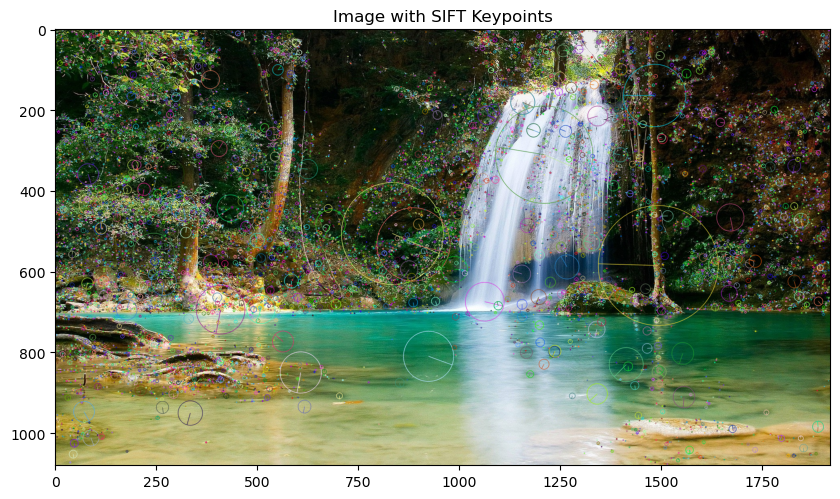

Number of keypoints detected: 14050
Descriptor shape: (14050, 128)


In [1]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = 'My.jpg'  # Replace with your image path
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Step 2: Create a SIFT detector
sift = cv2.SIFT_create()

# Step 3: Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# Step 4: Draw keypoints
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None,
                                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Step 5: Display the image with keypoints
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image with SIFT Keypoints')
plt.show()

# Optional: Print number of keypoints and descriptor size
print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")


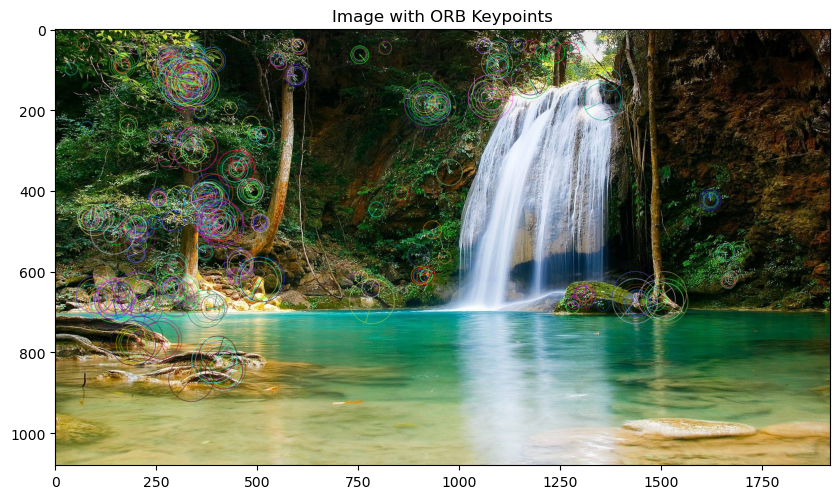

Number of keypoints detected: 500
Descriptor shape: (500, 32)


In [3]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = 'My.jpg'  # Replace with your image path
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Step 2: Create an ORB detector
orb = cv2.ORB_create()

# Step 3: Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Step 4: Draw keypoints
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None,
                                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Step 5: Display the image with keypoints
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image with ORB Keypoints')
plt.show()

# Optional: Print number of keypoints and descriptor size
print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")


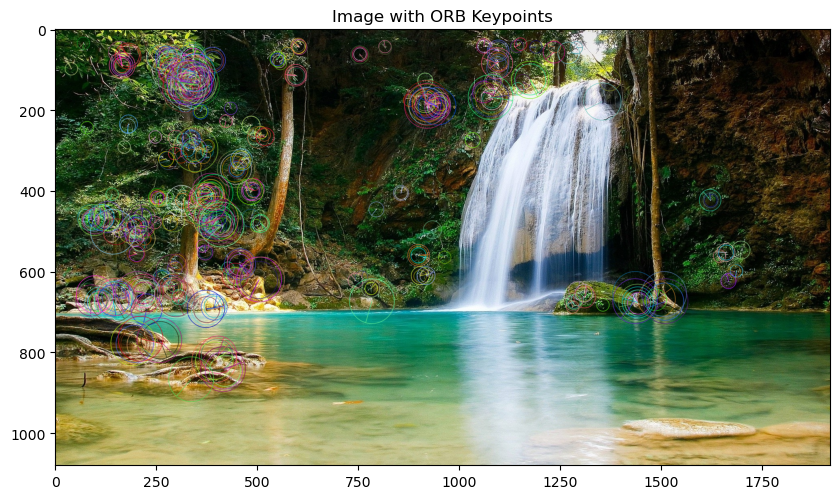

Number of keypoints detected: 500
Descriptor shape: (500, 32)


In [4]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = 'My.jpg'  # Replace with your image path
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

# Step 2: Create an ORB detector
orb = cv2.ORB_create()

# Step 3: Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Step 4: Draw keypoints
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None,
                                         flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Step 5: Display the image with keypoints
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image with ORB Keypoints')
plt.show()

# Optional: Print number of keypoints and descriptor size
print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")


# Descriptor Extraction:

Histogram of Oriented Gradients (HOG)
SIFT Descriptor
SURF Descriptor
BRIEF Descriptor
ORB Descriptor

Sure, let's delve into the details of various feature descriptors used in computer vision: Histogram of Oriented Gradients (HOG), Scale-Invariant Feature Transform (SIFT), Speeded-Up Robust Features (SURF), Binary Robust Independent Elementary Features (BRIEF), and Oriented FAST and Rotated BRIEF (ORB).

### 1. Histogram of Oriented Gradients (HOG)

**Concept:**
HOG is a feature descriptor used to detect objects in images. It counts occurrences of gradient orientation in localized portions of an image.

**Steps:**
1. **Gradient Computation**: Compute the gradient of the image by filtering it with kernels such as [-1, 0, 1] and its transpose.
2. **Orientation Binning**: Divide the image into small spatial regions called cells. Within each cell, a histogram of gradient directions is created.
3. **Descriptor Blocks**: Group adjacent cells into blocks to normalize the histogram and make it less sensitive to changes in illumination and shadowing.
4. **Block Normalization**: Normalize the histograms across blocks to account for variations in lighting.

**Equations:**
- Gradient magnitude: \( M(x,y) = \sqrt{(G_x(x,y))^2 + (G_y(x,y))^2} \)
- Gradient orientation: \( \theta(x,y) = \tan^{-1}\left(\frac{G_y(x,y)}{G_x(x,y)}\right) \)

### 2. Scale-Invariant Feature Transform (SIFT)

**Concept:**
SIFT detects and describes local features in images. It is invariant to scaling, rotation, and partially invariant to changes in illumination and affine transformations.

**Steps:**
1. **Scale-space Extrema Detection**: Use a Difference of Gaussian (DoG) function to identify potential interest points that are invariant to scale.
2. **Keypoint Localization**: Refine the detected keypoints to achieve higher accuracy by fitting a 3D quadratic function to local sample points.
3. **Orientation Assignment**: Assign an orientation to each keypoint based on local image gradient directions.
4. **Keypoint Descriptor**: Create a descriptor for each keypoint by computing the gradient magnitude and orientation around the keypoint.

**Equations:**
- Difference of Gaussian: \( D(x,y,\sigma) = (G(x,y,k\sigma) - G(x,y,\sigma)) * I(x,y) \)
- Gradient magnitude and orientation (similar to HOG).

### 3. Speeded-Up Robust Features (SURF)

**Concept:**
SURF is similar to SIFT but uses an approximation of the Hessian matrix and integral images for faster computation.

**Steps:**
1. **Interest Point Detection**: Use a fast Hessian matrix-based detector to find keypoints.
2. **Orientation Assignment**: Assign an orientation to each keypoint using Haar wavelet responses.
3. **Descriptor Extraction**: Use the sum of Haar wavelet responses within a neighborhood around the keypoint to form the descriptor.

**Equations:**
- Hessian matrix approximation: \( H(x,y,\sigma) = \begin{bmatrix} L_{xx}(x,y,\sigma) & L_{xy}(x,y,\sigma) \\ L_{xy}(x,y,\sigma) & L_{yy}(x,y,\sigma) \end{bmatrix} \)
- Response \( L \) is the convolution of the Gaussian second-order derivative with the image.

### 4. Binary Robust Independent Elementary Features (BRIEF)

**Concept:**
BRIEF is a binary descriptor that provides a concise representation of image patches by comparing the intensities of pairs of points.

**Steps:**
1. **Smoothing**: Apply a Gaussian filter to the image patch.
2. **Intensity Comparisons**: Perform pairwise intensity comparisons at a set of predefined locations in the smoothed patch.
3. **Binary Descriptor**: Convert the result of each comparison into a bit, forming a binary string.

**Equations:**
- Binary test: \( \tau(p_i, p_j) = \begin{cases} 1 & \text{if } I(p_i) < I(p_j) \\ 0 & \text{otherwise} \end{cases} \)
- Descriptor: \( \mathbf{d} = \sum_{k=1}^n 2^{k-1} \tau(p_{i_k}, p_{j_k}) \)

### 5. Oriented FAST and Rotated BRIEF (ORB)

**Concept:**
ORB is a combination of FAST keypoint detector and BRIEF descriptor, with added rotation invariance and improved resistance to noise.

**Steps:**
1. **Keypoint Detection**: Use FAST to detect keypoints.
2. **Orientation Assignment**: Compute the orientation using the intensity centroid method.
3. **Descriptor Extraction**: Rotate the BRIEF descriptor according to the keypoint orientation to achieve rotation invariance.

**Equations:**
- Intensity centroid: Compute moments \( m_{10} \) and \( m_{01} \) and use them to find the orientation \( \theta = \tan^{-1}\left(\frac{m_{01}}{m_{10}}\right) \).

### Summary
- **HOG** is primarily used for object detection and captures gradient orientations.
- **SIFT** is robust and invariant to scale, rotation, and partially invariant to affine transformations.
- **SURF** offers faster computation with similar properties to SIFT.
- **BRIEF** is a binary descriptor that is fast and memory efficient.
- **ORB** combines the speed of BRIEF and the robustness of SIFT and SURF with added rotation invariance.

HOG descriptor length: 1152936


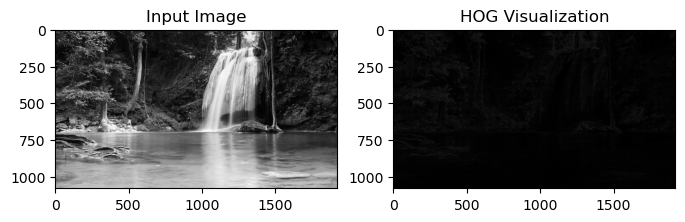

In [2]:
import numpy as np
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

def compute_gradients(img):
    # Compute gradients along the x and y axis
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=1)
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=1)
    return gx, gy

def compute_magnitude_orientation(gx, gy):
    # Compute gradient magnitude and orientation
    magnitude = np.sqrt(gx**2 + gy**2)
    orientation = np.arctan2(gy, gx) * (180 / np.pi) % 180  # Convert to degrees and keep in [0, 180)
    return magnitude, orientation

def get_hog_descriptor(img, cell_size=8, block_size=2, nbins=9):
    # Convert to grayscale if the image is in color
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    gx, gy = compute_gradients(img)
    magnitude, orientation = compute_magnitude_orientation(gx, gy)
    
    height, width = img.shape
    n_cells_x = width // cell_size
    n_cells_y = height // cell_size
    
    # Initialize the HOG descriptor array
    hog_descriptor = np.zeros((n_cells_y, n_cells_x, nbins))
    
    # Compute the histogram for each cell
    for i in range(n_cells_y):
        for j in range(n_cells_x):
            cell_magnitude = magnitude[i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size]
            cell_orientation = orientation[i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size]
            hist, _ = np.histogram(cell_orientation, bins=nbins, range=(0, 180), weights=cell_magnitude)
            hog_descriptor[i, j, :] = hist

    # Normalize the histograms over blocks
    n_blocks_y = n_cells_y - block_size + 1
    n_blocks_x = n_cells_x - block_size + 1
    normalized_hog = np.zeros((n_blocks_y, n_blocks_x, block_size, block_size, nbins))
    
    for y in range(n_blocks_y):
        for x in range(n_blocks_x):
            block = hog_descriptor[y:y+block_size, x:x+block_size, :]
            normalized_block = block / np.sqrt(np.sum(block**2) + 1e-5)
            normalized_hog[y, x, :] = normalized_block
            
    return normalized_hog.ravel()

# Example usage
if __name__ == "__main__":
    img = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)
    hog_descriptor = get_hog_descriptor(img)
    print("HOG descriptor length:", len(hog_descriptor))

    # Visualization using skimage's HOG function for comparison
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True)
    
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.imshow(img, cmap='gray')
    plt.title('Input Image')
    
    plt.subplot(122)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')
    plt.show()


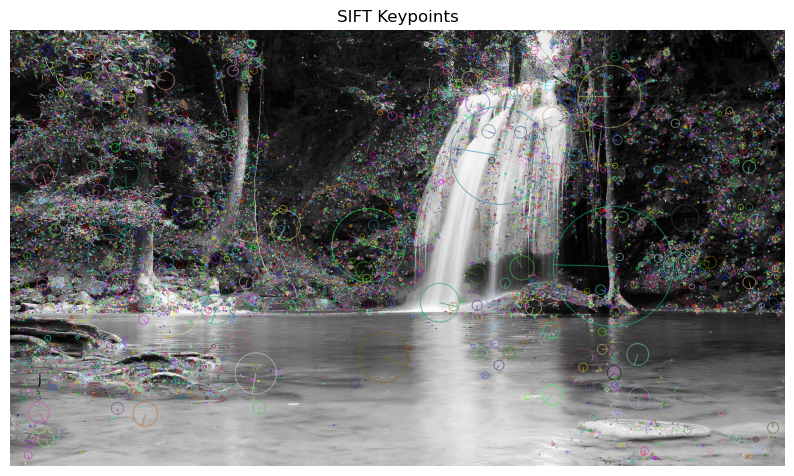

True

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = 'My.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded fine
if img is None:
    print("Error loading image")
    exit()

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect SIFT features in the image
keypoints, descriptors = sift.detectAndCompute(img, None)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.figure(figsize=(10, 10))
plt.imshow(img_with_keypoints)
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()

# Optionally save the result
output_path = 'output_image_with_sift_keypoints.jpg'
cv2.imwrite(output_path, img_with_keypoints)


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Error: Image not loaded.")
    exit()

# Create SURF detector object
#surf = cv2.xfeatures2d.SURF_create(400)

# Detect keypoints and descriptors
#keypoints, descriptors = surf.detectAndCompute(image, None)

# Draw keypoints on the image
#image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, (255, 0, 0), 4)

# Display the image with keypoints
#plt.imshow(image_with_keypoints)
#plt.title('SURF Keypoints')
#plt.show()


In [6]:
import cv2
import numpy as np

class BRIEF:
    def __init__(self, n=256):
        self.n = n  # Number of binary tests
        self.pairs = self._generate_pairs()

    def _generate_pairs(self):
        """Generate random pairs for binary tests."""
        np.random.seed(0)  # For reproducibility
        pairs = np.random.randint(0, 48, (self.n, 4))
        return pairs

    def _intensity_compare(self, patch, pair):
        """Compare the intensity of two points in the patch."""
        p1 = patch[pair[0], pair[1]]
        p2 = patch[pair[2], pair[3]]
        return p1 < p2

    def compute(self, image, keypoints):
        """Compute BRIEF descriptors for given keypoints."""
        descriptors = []

        for kp in keypoints:
            x, y = int(kp.pt[0]), int(kp.pt[1])
            patch = image[y-24:y+24, x-24:x+24]  # 48x48 patch

            if patch.shape[0] != 48 or patch.shape[1] != 48:
                continue  # Ignore keypoints near the border

            desc = []
            for pair in self.pairs:
                if self._intensity_compare(patch, pair):
                    desc.append(1)
                else:
                    desc.append(0)

            descriptors.append(desc)

        return np.array(descriptors, dtype=np.uint8)

def main():
    # Read the input image
    image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

    # Detect keypoints using FAST detector
    fast = cv2.FastFeatureDetector_create()
    keypoints = fast.detect(image, None)

    # Compute BRIEF descriptors
    brief = BRIEF()
    descriptors = brief.compute(image, keypoints)

    print("Number of keypoints detected:", len(keypoints))
    print("Descriptors shape:", descriptors.shape)

    # Draw keypoints on the image
    output_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))
    cv2.imshow('Keypoints', output_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


Number of keypoints detected: 89717
Descriptors shape: (85224, 256)


In [7]:
import cv2
import numpy as np

def main():
    # Read the input image
    image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Could not load image.")
        return

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = orb.detectAndCompute(image, None)

    print("Number of keypoints detected:", len(keypoints))
    print("Descriptors shape:", descriptors.shape)

    # Draw keypoints on the image
    output_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)
    cv2.imshow('ORB Keypoints', output_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


Number of keypoints detected: 500
Descriptors shape: (500, 32)


# Feature Matching:

Brute-Force Matching
FLANN (Fast Library for Approximate Nearest Neighbors) Matching
RANSAC (Random Sample Consensus)

Feature matching is a fundamental concept in computer vision, particularly in tasks like object recognition, image registration, and 3D reconstruction. It involves finding correspondences between keypoints or features detected in different images. Here's an overview of the methods you mentioned:

1. **Brute-Force Matching**:
   - In brute-force matching, every feature in one image is compared with every feature in the other image. This method guarantees finding the best matching feature but can be computationally expensive, especially for large datasets.
   - The matching score can be computed using various metrics such as Euclidean distance, Hamming distance (for binary descriptors like ORB), or other similarity measures.

2. **FLANN (Fast Library for Approximate Nearest Neighbors) Matching**:
   - FLANN is a library that provides fast approximate nearest neighbor search algorithms. It's particularly useful for speeding up feature matching when dealing with large datasets.
   - FLANN uses methods like KD-trees, Hierarchical k-means trees, or Locality Sensitive Hashing (LSH) to efficiently search for nearest neighbors.
   - Instead of exhaustively searching through all features, FLANN approximates the nearest neighbors, sacrificing accuracy for speed.

3. **RANSAC (Random Sample Consensus)**:
   - RANSAC is an iterative method used to estimate parameters of a mathematical model from a set of observed data points that may contain outliers.
   - In the context of feature matching, RANSAC is often employed after finding putative matches between keypoints to robustly estimate the transformation (e.g., homography) between images despite outliers.
   - It randomly selects a minimal subset of data points, fits a model to them, and then checks how many other data points agree with this model within a certain threshold. This process is repeated for a fixed number of iterations to find the best model.

Equations involved in RANSAC:

1. **Model Fitting**:
   - Given a set of data points \((x_i, y_i)\), a model with parameters \(m\) is fitted to these points. For example, in the case of line fitting, the model could be \(y = mx + c\).

2. **Residual Calculation**:
   - After fitting the model, the residual for each data point is calculated. This is typically the perpendicular distance from the data point to the model.

3. **Consensus Set Determination**:
   - A data point is considered to be part of the consensus set if its residual is less than a predefined threshold.

4. **Model Evaluation**:
   - The model is evaluated based on the size of the consensus set. A larger consensus set implies a better model.

5. **Iteration**:
   - The above steps are repeated for a fixed number of iterations, and the model with the largest consensus set is selected as the final model.

RANSAC is widely used in various computer vision tasks, including image stitching, structure from motion, and object detection, to handle outliers and noisy data effectively.

In [8]:
import cv2

def brute_force_match(des1, des2, method='euclidean'):
    # Create a BFMatcher object
    if method == 'euclidean':
        bf = cv2.BFMatcher(cv2.NORM_L2)
    elif method == 'hamming':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    else:
        raise ValueError("Invalid method. Choose 'euclidean' or 'hamming'.")

    # Perform matching
    matches = bf.match(des1, des2)

    # Sort matches based on distance
    matches = sorted(matches, key=lambda x: x.distance)

    return matches

# Example usage:
# Load images
img1 = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Detect keypoints and compute descriptors
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# Perform brute-force matching
matches = brute_force_match(descriptors1, descriptors2)

# Draw matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result
cv2.imshow('Brute-Force Matching', img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:
import cv2

def flann_match(des1, des2, index_params=None, search_params=None):
    # Create FLANN matcher object
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    # Perform matching
    matches = flann.knnMatch(des1, des2, k=2)

    # Apply ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    return good_matches

# Example usage:
# Load images
img1 = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Detect keypoints and compute descriptors
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)

# Initialize search parameters
search_params = dict(checks=50)  # or pass an empty dictionary

# Perform FLANN matching
#matches = flann_match(descriptors1, descriptors2, index_params, search_params)

# Draw matches
img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result
cv2.imshow('FLANN Matching', img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [15]:
import cv2
import numpy as np

def ransac_homography(keypoints1, keypoints2, matches, num_iterations=1000, threshold=4.0):
    best_homography = None
    max_inliers = 0

    for _ in range(num_iterations):
        # Randomly select 4 matches
        sample_indices = np.random.choice(len(matches), 4, replace=False)
        sample_matches = [matches[i] for i in sample_indices]  # Convert indices to matches
        src_points = np.float32([keypoints1[m.queryIdx].pt for m in sample_matches]).reshape(-1, 1, 2)
        dst_points = np.float32([keypoints2[m.trainIdx].pt for m in sample_matches]).reshape(-1, 1, 2)

        # Compute homography
        homography, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC, threshold)

        # Count inliers
        inliers = 0
        for match in matches:
            pt1 = np.array(keypoints1[match.queryIdx].pt)
            pt2 = np.array(keypoints2[match.trainIdx].pt)
            pt2_transformed = np.dot(homography, np.array([pt1[0], pt1[1], 1]))
            pt2_transformed /= pt2_transformed[2]
            distance = np.linalg.norm(pt2 - pt2_transformed[:2])
            if distance < threshold:
                inliers += 1

        # Update best homography if the current model has more inliers
        if inliers > max_inliers:
            max_inliers = inliers
            best_homography = homography

    return best_homography

# Example usage:
# Load images
img1 = cv2.imread('My.jpg')
img2 = cv2.imread('My.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detect keypoints and compute descriptors
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

# Match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Apply RANSAC to estimate homography
homography = ransac_homography(keypoints1, keypoints2, matches)

# Warp image1 to image2 using the estimated homography
result = cv2.warpPerspective(img1, homography, (img2.shape[1], img2.shape[0]))

# Display the result
cv2.imshow('RANSAC Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Homography Estimation:

Perspective Transform
Direct Linear Transform (DLT)
RANSAC-based Homography Estimation

### Homography Estimation

Homography estimation is a critical technique in computer vision, allowing the mapping of points from one plane to another. It is widely used in applications such as image stitching, camera calibration, and perspective correction.

### Concepts and Definitions

A homography is a transformation that maps points from one plane to another using a 3x3 matrix \( \mathbf{H} \). If \( \mathbf{p}_1 = [x_1, y_1, 1]^T \) and \( \mathbf{p}_2 = [x_2, y_2, 1]^T \) are corresponding points in two images, the homography \( \mathbf{H} \) satisfies:

\[ \mathbf{p}_2 \sim \mathbf{H} \mathbf{p}_1 \]

where \( \sim \) denotes equality up to a scale factor.

### Homography Matrix

The homography matrix \( \mathbf{H} \) has the form:

\[ \mathbf{H} = \begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{bmatrix} \]

### Estimation Methods

#### 1. Direct Linear Transform (DLT)

The DLT algorithm estimates the homography matrix using a set of point correspondences. At least four pairs of corresponding points are required.

**Equations:**

Given \( n \) pairs of corresponding points \( (\mathbf{p}_1^{(i)}, \mathbf{p}_2^{(i)}) \):

\[ \mathbf{p}_2^{(i)} \sim \mathbf{H} \mathbf{p}_1^{(i)} \]

For each pair, the following equation can be derived:

\[ \mathbf{p}_2^{(i)} \times (\mathbf{H} \mathbf{p}_1^{(i)}) = 0 \]

This leads to two linear equations for each pair of points:

\[ \begin{aligned}
x_1' h_{31} x_1 + x_1' h_{32} y_1 + x_1' h_{33} - x_2' h_{11} x_1 - x_2' h_{12} y_1 - x_2' h_{13} &= 0 \\
y_1' h_{31} x_1 + y_1' h_{32} y_1 + y_1' h_{33} - y_2' h_{21} x_1 - y_2' h_{22} y_1 - y_2' h_{23} &= 0
\end{aligned} \]

These equations can be written in the form \( \mathbf{A} \mathbf{h} = 0 \), where \( \mathbf{A} \) is a \( 2n \times 9 \) matrix and \( \mathbf{h} \) is a 9-element vector containing the elements of \( \mathbf{H} \).

\[ \mathbf{A} = \begin{bmatrix}
\mathbf{0}^T & -w \mathbf{p}_1^T & y_2 \mathbf{p}_1^T \\
w \mathbf{p}_1^T & \mathbf{0}^T & -x_2 \mathbf{p}_1^T \\
\end{bmatrix} \]

The solution to this system is the singular vector corresponding to the smallest singular value of \( \mathbf{A} \), which can be found using Singular Value Decomposition (SVD).

#### 2. RANSAC-based Homography Estimation

RANSAC (Random Sample Consensus) is a robust method to estimate the homography matrix in the presence of outliers.

**Algorithm:**

1. **Select a subset:** Randomly select a subset of four point correspondences.
2. **Compute Homography:** Use the DLT algorithm to compute the homography matrix from the subset.
3. **Count Inliers:** Calculate the number of inliers by transforming all points using the estimated homography and counting the points that fit the model within a tolerance.
4. **Repeat:** Repeat the above steps for a fixed number of iterations.
5. **Best Model:** Choose the homography with the highest number of inliers.

**Pseudocode:**

```python
best_H = None
max_inliers = 0

for iteration in range(max_iterations):
    # Randomly select 4 correspondences
    sample = random.sample(point_correspondences, 4)
    H = compute_homography_DLT(sample)
    
    inliers = 0
    for (p1, p2) in point_correspondences:
        p2_estimated = H @ p1
        if distance(p2, p2_estimated) < tolerance:
            inliers += 1
    
    if inliers > max_inliers:
        best_H = H
        max_inliers = inliers

return best_H
```

### Implementation in Python using OpenCV

OpenCV provides functions for homography estimation, including both DLT and RANSAC methods.

#### Using OpenCV

```python
import cv2
import numpy as np

# Define point correspondences
src_pts = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]], dtype=np.float32)
dst_pts = np.array([[x1', y1'], [x2', y2'], [x3', y3'], [x4', y4']], dtype=np.float32)

# Estimate homography matrix using DLT (least squares method)
H, status = cv2.findHomography(src_pts, dst_pts, method=0)

# Estimate homography matrix using RANSAC
H_ransac, status_ransac = cv2.findHomography(src_pts, dst_pts, method=cv2.RANSAC, ransacReprojThreshold=3.0)

# Apply the homography to an image
img = cv2.imread('path_to_image.jpg')
height, width = img.shape[:2]
warped_img = cv2.warpPerspective(img, H_ransac, (width, height))

# Display the result
cv2.imshow('Warped Image', warped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

### Equations and Details

#### Homography Transformation

For a point \( \mathbf{p} = [x, y, 1]^T \) and homography matrix \( \mathbf{H} \):

\[ \mathbf{p}' = \mathbf{H} \mathbf{p} = \begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{bmatrix} \begin{bmatrix}
x \\
y \\
1
\end{bmatrix} \]

After multiplication, the new coordinates \( \mathbf{p}' \) are given by:

\[ x' = \frac{h_{11} x + h_{12} y + h_{13}}{h_{31} x + h_{32} y + h_{33}} \]
\[ y' = \frac{h_{21} x + h_{22} y + h_{23}}{h_{31} x + h_{32} y + h_{33}} \]

### Conclusion

Homography estimation is essential in computer vision for tasks involving planar transformations. The DLT algorithm provides a straightforward method for calculating homographies from point correspondences, while RANSAC offers robustness against outliers. Understanding the underlying mathematics and using libraries like OpenCV allows for effective implementation and application of these techniques in various computer vision problems.

In [2]:
import numpy as np

def compute_homography_dlt(src_pts, dst_pts):
    """
    Compute the homography matrix using the Direct Linear Transform (DLT) method.

    Args:
    src_pts (np.ndarray): Source points in the form of (N, 2).
    dst_pts (np.ndarray): Destination points in the form of (N, 2).

    Returns:
    np.ndarray: The 3x3 homography matrix.
    """
    if src_pts.shape[0] != dst_pts.shape[0] or src_pts.shape[0] < 4:
        raise ValueError("There must be at least 4 point correspondences and the same number of points in each set.")
    
    num_points = src_pts.shape[0]
    A = []

    for i in range(num_points):
        x, y = src_pts[i][0], src_pts[i][1]
        xp, yp = dst_pts[i][0], dst_pts[i][1]
        A.append([-x, -y, -1, 0, 0, 0, xp*x, xp*y, xp])
        A.append([0, 0, 0, -x, -y, -1, yp*x, yp*y, yp])
    
    A = np.array(A)
    U, S, Vh = np.linalg.svd(A)
    H = Vh[-1].reshape(3, 3)
    
    return H / H[-1, -1]

# Example usage
src_pts = np.array([[0, 0], [1, 0], [1, 1], [0, 1]], dtype=np.float32)
dst_pts = np.array([[0, 0], [2, 0], [2, 2], [0, 2]], dtype=np.float32)

H = compute_homography_dlt(src_pts, dst_pts)
print("Homography matrix (DLT):")
print(H)


Homography matrix (DLT):
[[ 2.00000000e+00  9.87455215e-17  0.00000000e+00]
 [-8.56670815e-17  2.00000000e+00 -1.77966791e-16]
 [ 1.18148180e-16  1.09175191e-15  1.00000000e+00]]


In [3]:
import random

def compute_homography_ransac(src_pts, dst_pts, max_iterations=1000, tolerance=5.0):
    """
    Compute the homography matrix using the RANSAC algorithm.

    Args:
    src_pts (np.ndarray): Source points in the form of (N, 2).
    dst_pts (np.ndarray): Destination points in the form of (N, 2).
    max_iterations (int): Maximum number of RANSAC iterations.
    tolerance (float): Distance tolerance to determine inliers.

    Returns:
    np.ndarray: The 3x3 homography matrix.
    np.ndarray: The mask of inliers (1 for inlier, 0 for outlier).
    """
    def compute_inliers(H, src_pts, dst_pts, tolerance):
        inliers = []
        num_points = src_pts.shape[0]
        
        for i in range(num_points):
            src_pt = np.append(src_pts[i], 1)
            dst_pt = np.append(dst_pts[i], 1)
            estimated_dst_pt = np.dot(H, src_pt)
            estimated_dst_pt /= estimated_dst_pt[2]
            
            if np.linalg.norm(estimated_dst_pt[:2] - dst_pt[:2]) < tolerance:
                inliers.append(i)
        
        return inliers

    best_H = None
    best_inliers = []
    num_points = src_pts.shape[0]

    for _ in range(max_iterations):
        # Randomly select 4 points
        indices = random.sample(range(num_points), 4)
        src_sample = src_pts[indices]
        dst_sample = dst_pts[indices]
        
        try:
            H = compute_homography_dlt(src_sample, dst_sample)
            inliers = compute_inliers(H, src_pts, dst_pts, tolerance)
            
            if len(inliers) > len(best_inliers):
                best_H = H
                best_inliers = inliers
        except np.linalg.LinAlgError:
            continue
    
    mask = np.zeros(num_points, dtype=np.uint8)
    mask[best_inliers] = 1
    
    return best_H, mask

# Example usage
src_pts = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0.5, 0.5]], dtype=np.float32)
dst_pts = np.array([[0, 0], [2, 0], [2, 2], [0, 2], [1, 1]], dtype=np.float32)

H_ransac, mask = compute_homography_ransac(src_pts, dst_pts)
print("Homography matrix (RANSAC):")
print(H_ransac)
print("Inliers mask:")
print(mask)


Homography matrix (RANSAC):
[[-1.44425621e+00  3.44425621e+00  0.00000000e+00]
 [-1.75982725e-16  2.00000000e+00  3.47228081e-16]
 [-1.72212811e+00  1.72212811e+00  1.00000000e+00]]
Inliers mask:
[1 1 1 1 1]


In [4]:
import cv2

# Convert points to the format required by OpenCV
src_pts_cv = src_pts.reshape(-1, 1, 2)
dst_pts_cv = dst_pts.reshape(-1, 1, 2)

# Using OpenCV's findHomography function with RANSAC
H_cv, mask_cv = cv2.findHomography(src_pts_cv, dst_pts_cv, cv2.RANSAC, ransacReprojThreshold=5.0)

print("Homography matrix (OpenCV RANSAC):")
print(H_cv)
print("Inliers mask (OpenCV):")
print(mask_cv)


Homography matrix (OpenCV RANSAC):
[[ 2.00000000e+00  4.47174273e-17 -3.34411062e-16]
 [ 2.24449286e-17  2.00000000e+00  7.93905940e-18]
 [ 5.30983695e-17  1.98779500e-17  1.00000000e+00]]
Inliers mask (OpenCV):
[[1]
 [1]
 [1]
 [1]
 [1]]


In [8]:
import cv2
import numpy as np

def load_images(src_image_path, dst_image_path):
    src_img = cv2.imread(src_image_path)
    dst_img = cv2.imread(dst_image_path)
    return src_img, dst_img

def detect_and_compute_keypoints(img):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    return keypoints, descriptors

def match_features(descriptors1, descriptors2):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    return matches

def find_homography(kp1, kp2, matches):
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    return H, mask

def warp_image(src_img, H, dst_shape):
    height, width = dst_shape
    warped_img = cv2.warpPerspective(src_img, H, (width, height))
    return warped_img

def main(src_image_path, dst_image_path):
    src_img, dst_img = load_images(src_image_path, dst_image_path)
    
    if src_img is None or dst_img is None:
        print("Error loading images. Please check the file paths.")
        return
    
    kp1, des1 = detect_and_compute_keypoints(src_img)
    kp2, des2 = detect_and_compute_keypoints(dst_img)
    
    if des1 is None or des2 is None:
        print("Error detecting features. Please check the images.")
        return
    
    matches = match_features(des1, des2)
    
    if len(matches) < 4:
        print("Not enough matches found. At least 4 matches are required.")
        return
    
    H, mask = find_homography(kp1, kp2, matches)
    
    if H is None:
        print("Homography could not be computed.")
        return
    
    height, width, _ = dst_img.shape
    warped_img = warp_image(src_img, H, (width, height))
    
    # Ensure the images are of the same size for blending
    if warped_img.shape != dst_img.shape:
        print(f"Resizing warped image from {warped_img.shape} to {dst_img.shape}")
        warped_img = cv2.resize(warped_img, (dst_img.shape[1], dst_img.shape[0]))
    
    result_img = cv2.addWeighted(dst_img, 0.5, warped_img, 0.5, 0)
    
    cv2.imshow("Warped Image", warped_img)
    cv2.imshow("Result Image", result_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    src_image_path = 'My.jpg'
    dst_image_path = 'My.jpg'
    main(src_image_path, dst_image_path)


Resizing warped image from (1920, 1080, 3) to (1080, 1920, 3)


 # Keypoint Localization:

DoG Keypoint Localization (for SIFT)
FAST Keypoint Detector

### Keypoint Localization

Keypoint localization is a crucial step in feature-based image registration, object detection, and recognition. It involves identifying distinctive points or regions in an image that are robust to changes in viewpoint, illumination, and noise. Two popular algorithms for keypoint localization are the Difference of Gaussians (DoG) method used in Scale-Invariant Feature Transform (SIFT) and the Features from Accelerated Segment Test (FAST) keypoint detector.

### 1. Difference of Gaussians (DoG) Keypoint Localization (for SIFT)

The DoG method is used in the SIFT algorithm to detect keypoints at multiple scales in an image. It involves computing the difference of Gaussian-blurred images at different scales to identify regions with significant intensity changes.

**Algorithm Steps:**

1. **Scale Space Construction:** Generate a series of blurred images (scale space) by convolving the original image with Gaussian kernels of increasing standard deviations.

2. **Difference of Gaussians (DoG) Pyramid:** Compute the difference between adjacent scales in the scale space to obtain the DoG pyramid.

3. **Keypoint Localization:** Find keypoints as local extrema in the DoG pyramid, where a keypoint is detected at a pixel if it is either a maximum or minimum compared to its 26 neighbors in space and scale.

4. **Subpixel Refinement:** Refine keypoint locations by fitting a 3D quadratic function to the intensity values around each extremum in the DoG pyramid.

### 2. FAST Keypoint Detector

FAST is a corner detection algorithm designed for real-time applications. It identifies keypoints as points where a circular pattern of pixels exhibits a significant intensity change compared to the center pixel.

**Algorithm Steps:**

1. **Feature Candidate Selection:** Select a pixel \( p \) in the image.

2. **Thresholding:** Define a threshold \( t \) and compare the intensity of \( p \) to the intensities of pixels on a circle of 16 surrounding pixels. If \( p \) is brighter or darker than at least \( n \) (typically 9) contiguous pixels, \( p \) is considered a potential keypoint.

3. **Non-maximum Suppression:** Further refine the keypoints by ensuring they are local maxima or minima in the surrounding pixels' intensities.

4. **Subpixel Refinement:** Optionally, refine the keypoint location using interpolation to improve localization accuracy.

### Conclusion

Keypoint localization plays a fundamental role in feature-based image analysis and computer vision tasks. The DoG method used in SIFT and the FAST keypoint detector are two popular algorithms for identifying distinctive points or regions in images. While SIFT offers robustness to scale and rotation changes, FAST provides real-time performance suitable for applications with strict computational constraints. Understanding these algorithms' principles and characteristics helps practitioners choose the most appropriate method for their specific application requirements.

In [9]:
import cv2
import numpy as np

def detect_keypoints_dog(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints using Difference of Gaussians (DoG)
    keypoints = sift.detect(gray, None)

    # Draw keypoints on the image
    keypoints_image = cv2.drawKeypoints(image, keypoints, None)

    return keypoints_image

# Example usage
image = cv2.imread('My.jpg')
keypoints_image = detect_keypoints_dog(image)
cv2.imshow('DoG Keypoint Localization', keypoints_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
import cv2

def detect_keypoints_fast(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create FAST detector
    fast = cv2.FastFeatureDetector_create()

    # Detect keypoints using FAST
    keypoints = fast.detect(gray, None)

    # Draw keypoints on the image
    keypoints_image = cv2.drawKeypoints(image, keypoints, None, color=(255, 0, 0))

    return keypoints_image

# Example usage
image = cv2.imread('My.jpg')
keypoints_image = detect_keypoints_fast(image)
cv2.imshow('FAST Keypoint Detector', keypoints_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Feature Tracking:

KLT (Kanade-Lucas-Tomasi) Tracker
Lucas-Kanade Optical Flow

Feature tracking, particularly the Kanade-Lucas-Tomasi (KLT) tracker and the Lucas-Kanade optical flow method, are widely used techniques in computer vision for tracking objects or points of interest in a sequence of images or video frames. Let's break down both methods:

### Kanade-Lucas-Tomasi (KLT) Tracker:

The KLT tracker is a feature tracking algorithm that aims to track specific points of interest in a video sequence. It's named after its developers: Takeo Kanade, Michael Lucas, and Carlo Tomasi.

**Steps involved in KLT:**

1. **Feature Detection**: Identify distinctive points or features in the initial frame of the video sequence. These features could be corners, edges, or any other distinctive local structures.

2. **Feature Matching**: In subsequent frames, find the corresponding positions of these features detected in the initial frame. This is often done by searching for the features in a local neighborhood around their expected positions.

3. **Tracking**: Update the position of each feature across frames based on the motion estimation between consecutive frames.

**Equation for Feature Tracking:**

The KLT tracker typically uses a pyramidal approach to handle large motion effectively. The Lucas-Kanade method, a specific variant of the KLT tracker, employs optical flow to estimate the motion of pixels between two consecutive frames.

### Lucas-Kanade Optical Flow:

The Lucas-Kanade method estimates the motion of objects between two consecutive frames by assuming that the motion is constant in a local neighborhood of the pixel being tracked. It's widely used in image processing and computer vision.

**Equation for Lucas-Kanade Optical Flow:**

The Lucas-Kanade optical flow method can be formulated as solving a set of linear equations for each pixel in the neighborhood:

Given:
- \(I_x\) and \(I_y\): Image gradients in the x and y directions respectively.
- \(I_t\): Temporal gradient (difference between pixel intensities in consecutive frames).

The optical flow equation for Lucas-Kanade can be written as:

\[ \begin{pmatrix}
I_x(p_1) & I_y(p_1) \\
I_x(p_2) & I_y(p_2) \\
\vdots & \vdots \\
I_x(p_n) & I_y(p_n)
\end{pmatrix} \begin{pmatrix}
v_x \\
v_y
\end{pmatrix} = - \begin{pmatrix}
I_t(p_1) \\
I_t(p_2) \\
\vdots \\
I_t(p_n)
\end{pmatrix} \]

Where:
- \((v_x, v_y)\) are the components of the optical flow (motion) at the pixel being tracked.
- \(p_1, p_2, ..., p_n\) are the pixel coordinates in the neighborhood.

**Solving for \(v_x\) and \(v_y\):**

The above equation is typically overdetermined (more equations than unknowns), so it's solved using techniques like least squares to obtain the best estimate of motion.

In summary, the KLT tracker and the Lucas-Kanade optical flow method are fundamental tools for tracking features in computer vision applications, enabling tasks like object tracking, motion estimation, and video stabilization.

In [1]:
import cv2
import numpy as np

# Function to detect features using Shi-Tomasi corner detection
def detect_features(image):
    # Parameters for Shi-Tomasi corner detection
    max_corners = 100
    quality_level = 0.3
    min_distance = 7
    corners = cv2.goodFeaturesToTrack(image, max_corners, quality_level, min_distance)
    return corners

# Function to track features using Lucas-Kanade optical flow
def track_features(prev_frame, curr_frame, prev_points):
    # Parameters for Lucas-Kanade optical flow
    lk_params = dict(winSize=(15, 15),
                     maxLevel=2,
                     criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # Calculate optical flow
    curr_points, status, _ = cv2.calcOpticalFlowPyrLK(prev_frame, curr_frame, prev_points, None, **lk_params)

    # Filter out points with low status
    good_new = curr_points[status == 1]
    good_old = prev_points[status == 1]

    return good_old, good_new

# Open video file
cap = cv2.VideoCapture('video.mp4')

# Read the first frame
ret, prev_frame = cap.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# Detect features in the first frame
prev_points = detect_features(prev_gray)

# Create a mask image for drawing purposes
mask = np.zeros_like(prev_frame)

while True:
    # Read current frame
    ret, curr_frame = cap.read()
    if not ret:
        break
    curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

    # Track features in the current frame
    prev_points, curr_points = track_features(prev_gray, curr_gray, prev_points)

    # Draw tracks
    for i, (new, old) in enumerate(zip(curr_points, prev_points)):
        a, b = new.ravel().astype(int)
        c, d = old.ravel().astype(int)
        mask = cv2.line(mask, (a, b), (c, d), (0, 255, 0), 2)
        curr_frame = cv2.circle(curr_frame, (a, b), 5, (0, 255, 0), -1)

    # Display the resulting frame
    img = cv2.add(curr_frame, mask)
    cv2.imshow('frame', img)

    # Update previous frame and points
    prev_gray = curr_gray.copy()
    prev_points = curr_points.reshape(-1, 1, 2)

    # Check for exit
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()


In [2]:
import cv2
import numpy as np

# Open video file
cap = cv2.VideoCapture('video.mp4')

# Read the first frame
ret, prev_frame = cap.read()
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

# Create a mask image for drawing purposes
mask = np.zeros_like(prev_frame)

while True:
    # Read current frame
    ret, curr_frame = cap.read()
    if not ret:
        break
    curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

    # Calculate optical flow using Lucas-Kanade method
    flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Compute the magnitude and angle of the optical flow
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Set image hue according to the optical flow direction
    mask[..., 0] = angle * 180 / np.pi / 2

    # Set image value according to the optical flow magnitude (normalized)
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # Convert HSV to BGR for display
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

    # Display the resulting frame
    cv2.imshow('frame', rgb)

    # Update previous frame
    prev_gray = curr_gray

    # Check for exit
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()


# Interest Point Detection:

Maximally Stable Extremal Regions (MSER)
Harris-Laplace
FAST (Features from Accelerated Segment Test)

Interest point detection is a crucial step in many computer vision applications, such as image matching, object recognition, and 3D reconstruction. It involves identifying points in an image that are invariant to transformations like rotation, scale, and lighting changes. Below are detailed descriptions of three interest point detection methods: Maximally Stable Extremal Regions (MSER), Harris-Laplace, and FAST (Features from Accelerated Segment Test).

### 1. Maximally Stable Extremal Regions (MSER)

**Overview**:
MSER is a method for blob detection in images. It extracts stable regions that remain nearly unchanged over a wide range of thresholds.

**Algorithm**:
1. **Intensity Thresholding**: Consider an image as a collection of regions formed by thresholding at various intensity levels.
2. **Extremal Regions**: Identify extremal regions where either all pixels inside the region have higher intensity than all pixels on its boundary (bright extremal regions) or vice versa (dark extremal regions).
3. **Stability Criterion**: Measure the stability of each region by analyzing the rate of change of its area as the intensity threshold varies. A region is considered maximally stable if its relative area remains nearly constant over a range of intensity thresholds.

**Mathematics**:
- For a region \( R \) at threshold \( t \), its stability is defined as:
  \[ \Delta(R) = \frac{|R_{t+1} - R_t|}{|R_t|} \]
  where \( |R_t| \) denotes the area of region \( R \) at threshold \( t \). Regions with the smallest \( \Delta(R) \) values are selected as MSERs.

### 2. Harris-Laplace Detector

**Overview**:
The Harris-Laplace detector combines the Harris corner detector with a Laplacian-based scale selection to achieve scale-invariance.

**Algorithm**:
1. **Harris Corner Detection**: Identify corner points using the Harris corner response function.
2. **Scale Selection**: Use the Laplacian of Gaussian (LoG) to select the appropriate scale for each corner point. This involves finding the scale at which the Laplacian response is maximized.
3. **Interest Point Detection**: Combine the corner strength from the Harris detector with the scale information from the LoG to identify stable interest points.

**Mathematics**:
- Harris Corner Response:
  \[ R = \det(M) - k \cdot (\text{trace}(M))^2 \]
  where \( M \) is the second moment matrix (also known as the structure tensor), and \( k \) is a sensitivity factor.
- Laplacian of Gaussian:
  \[ \text{LoG}(x, y, \sigma) = \sigma^2 \left( \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2} \right) \]
  Scale selection involves finding \( \sigma \) that maximizes the Laplacian response.

### 3. FAST (Features from Accelerated Segment Test)

**Overview**:
FAST is a high-speed corner detection algorithm designed to be computationally efficient and suitable for real-time applications.

**Algorithm**:
1. **Pixel Comparison**: For each pixel \( p \) in the image, compare its intensity with the intensities of 16 pixels in a circle around \( p \) (Bresenham circle of radius 3).
2. **Corner Criterion**: A pixel \( p \) is classified as a corner if there exists a set of \( n \) contiguous pixels in the circle that are all either brighter than \( p \) by a threshold \( t \) or darker than \( p \) by \( t \).
3. **Non-maximum Suppression**: Apply non-maximum suppression to remove redundant corners and retain only the strongest corners.

**Mathematics**:
- Pixel Comparison:
  \[ \text{Let } I_p \text{ be the intensity of pixel } p. \]
  \[ \text{Let } I_i \text{ be the intensities of the 16 pixels on the circle.} \]
  A pixel \( p \) is a corner if:
  \[ \exists \, n \text{ contiguous pixels } I_i \text{ such that } I_i > I_p + t \text{ or } I_i < I_p - t \]

### Python Implementation Using OpenCV

Here's how you can implement these detectors using OpenCV in Python:

1. **MSER**:

```python
import cv2

# Load image
image = cv2.imread('input_image.jpg', cv2.IMREAD_GRAYSCALE)

# Create MSER object
mser = cv2.MSER_create()

# Detect MSER regions
regions, _ = mser.detectRegions(image)

# Draw MSER regions
output_image = image.copy()
for region in regions:
    hull = cv2.convexHull(region.reshape(-1, 1, 2))
    cv2.polylines(output_image, [hull], 1, (0, 255, 0))

cv2.imshow('MSER Regions', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

2. **Harris-Laplace** (Custom implementation):

```python
import cv2
import numpy as np

# Load image
image = cv2.imread('input_image.jpg', cv2.IMREAD_GRAYSCALE)

# Parameters for Harris corner detection
block_size = 2
ksize = 3
k = 0.04

# Harris corner detection
harris_corners = cv2.cornerHarris(image, block_size, ksize, k)
harris_corners = cv2.dilate(harris_corners, None)

# Parameters for Laplacian of Gaussian (scale selection)
sigma_start = 1
sigma_end = 3
sigma_step = 0.5

scales = np.arange(sigma_start, sigma_end, sigma_step)
max_response = np.zeros_like(image, dtype=float)

for sigma in scales:
    log_image = cv2.GaussianBlur(image, (0, 0), sigma)
    log_image = cv2.Laplacian(log_image, cv2.CV_64F)
    max_response = np.maximum(max_response, np.abs(log_image))

# Combine Harris and Laplacian results
combined_response = harris_corners * max_response
threshold = 0.01 * combined_response.max()
interest_points = np.where(combined_response >= threshold)

output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for point in zip(*interest_points[::-1]):
    cv2.circle(output_image, point, 3, (0, 255, 0), 1)

cv2.imshow('Harris-Laplace Interest Points', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

3. **FAST**:

```python
import cv2

# Load image
image = cv2.imread('input_image.jpg', cv2.IMREAD_GRAYSCALE)

# Create FAST detector object
fast = cv2.FastFeatureDetector_create()

# Detect keypoints
keypoints = fast.detect(image, None)

# Draw keypoints
output_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

cv2.imshow('FAST Keypoints', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

These implementations use OpenCV to perform interest point detection with the MSER, Harris-Laplace, and FAST algorithms. Adjust the parameters as needed for your specific use case.

In [1]:
import cv2

# Load image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Create MSER object
mser = cv2.MSER_create()

# Detect MSER regions
regions, _ = mser.detectRegions(image)

# Draw MSER regions
output_image = image.copy()
for region in regions:
    hull = cv2.convexHull(region.reshape(-1, 1, 2))
    cv2.polylines(output_image, [hull], 1, (0, 255, 0))

cv2.imshow('MSER Regions', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np

# Load image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Parameters for Harris corner detection
block_size = 2
ksize = 3
k = 0.04

# Harris corner detection
harris_corners = cv2.cornerHarris(image, block_size, ksize, k)
harris_corners = cv2.dilate(harris_corners, None)

# Parameters for Laplacian of Gaussian (scale selection)
sigma_start = 1
sigma_end = 3
sigma_step = 0.5

scales = np.arange(sigma_start, sigma_end, sigma_step)
max_response = np.zeros_like(image, dtype=float)

for sigma in scales:
    log_image = cv2.GaussianBlur(image, (0, 0), sigma)
    log_image = cv2.Laplacian(log_image, cv2.CV_64F)
    max_response = np.maximum(max_response, np.abs(log_image))

# Combine Harris and Laplacian results
combined_response = harris_corners * max_response
threshold = 0.01 * combined_response.max()
interest_points = np.where(combined_response >= threshold)

output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for point in zip(*interest_points[::-1]):
    cv2.circle(output_image, point, 3, (0, 255, 0), 1)

cv2.imshow('Harris-Laplace Interest Points', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
import cv2

# Load image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Create FAST detector object
fast = cv2.FastFeatureDetector_create()

# Detect keypoints
keypoints = fast.detect(image, None)

# Draw keypoints
output_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

cv2.imshow('FAST Keypoints', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Binary Descriptors:

BRIEF (Binary Robust Independent Elementary Features)
BRISK (Binary Robust Invariant Scalable Keypoints)
FREAK (Fast Retina Keypoint)

Binary descriptors are an important category in feature detection and description for computer vision tasks, designed to provide efficient and robust ways to represent keypoints in images. They are particularly useful in resource-constrained environments due to their compact representation and fast computation. Below, we delve into three widely used binary descriptors: BRIEF, BRISK, and FREAK.

### 1. BRIEF (Binary Robust Independent Elementary Features)

**Overview**:
BRIEF is a binary descriptor that creates a binary string representation of an image patch around a keypoint. It is known for its simplicity and speed, making it suitable for real-time applications.

**Algorithm**:
1. **Keypoint Detection**: Detect keypoints using any detector (e.g., FAST, Harris).
2. **Image Patch Extraction**: Extract a square patch around each keypoint.
3. **Binary Test Definition**: Define a set of binary tests by comparing pixel intensities at pairs of points within the patch.
4. **Descriptor Construction**: Construct the binary descriptor by performing each binary test and recording the result as a bit in the binary string.

**Mathematics**:
- Let \( p \) be the keypoint position, and let \( I(p) \) denote the intensity at point \( p \).
- Define a set of \( n \) pairs of points \( (p_i, q_i) \) within the patch.
- The binary test \( \tau \) is:
  \[ \tau(p_i, q_i) = \begin{cases} 
      1 & \text{if } I(p_i) < I(q_i) \\
      0 & \text{otherwise}
  \end{cases} \]
- The descriptor is an \( n \)-bit binary string:
  \[ d = [\tau(p_1, q_1), \tau(p_2, q_2), \ldots, \tau(p_n, q_n)] \]

**Advantages**:
- Simple and fast to compute.
- Compact representation.

**Limitations**:
- Not rotation or scale invariant.
- Sensitive to noise and illumination changes.

### 2. BRISK (Binary Robust Invariant Scalable Keypoints)

**Overview**:
BRISK is a binary descriptor that extends BRIEF to be scale and rotation invariant. It combines a scale-space keypoint detector with a binary descriptor.

**Algorithm**:
1. **Keypoint Detection**: Detect keypoints using a scale-space pyramid.
2. **Orientation Assignment**: Assign an orientation to each keypoint based on local gradients.
3. **Sampling Pattern**: Use a predefined circular sampling pattern around the keypoint.
4. **Binary Test Definition**: Perform binary tests using the intensity differences between pairs of sample points.
5. **Descriptor Construction**: Construct the binary descriptor using the results of the binary tests.

**Mathematics**:
- Let \( \theta \) be the orientation of the keypoint.
- Sample pairs \( (p_i, q_i) \) are rotated by \( \theta \).
- Binary test \( \tau \):
  \[ \tau(p_i, q_i, \theta) = \begin{cases} 
      1 & \text{if } I(R_\theta(p_i)) < I(R_\theta(q_i)) \\
      0 & \text{otherwise}
  \end{cases} \]
  where \( R_\theta \) is the rotation matrix.
- Descriptor is an \( n \)-bit binary string:
  \[ d = [\tau(p_1, q_1, \theta), \tau(p_2, q_2, \theta), \ldots, \tau(p_n, q_n, \theta)] \]

**Advantages**:
- Scale and rotation invariant.
- Robust to image deformations and noise.

**Limitations**:
- More computationally intensive than BRIEF.

### 3. FREAK (Fast Retina Keypoint)

**Overview**:
FREAK is a binary descriptor inspired by the human visual system, specifically the retina. It uses a retinal sampling pattern for keypoint description, which is efficient and robust.

**Algorithm**:
1. **Keypoint Detection**: Detect keypoints using any detector.
2. **Retinal Sampling Pattern**: Use a retinal pattern that mimics the distribution of photoreceptors in the human eye, with more points sampled closer to the keypoint.
3. **Orientation Assignment**: Assign orientation to keypoints based on intensity gradients.
4. **Binary Test Definition**: Perform binary tests between pairs of points in the sampling pattern.
5. **Descriptor Construction**: Construct the binary descriptor using the results of the binary tests.

**Mathematics**:
- Use a retinal sampling pattern \( S \) with points \( p_i \) distributed logarithmically around the keypoint.
- Binary test \( \tau \):
  \[ \tau(p_i, q_i, \theta) = \begin{cases} 
      1 & \text{if } I(R_\theta(p_i)) < I(R_\theta(q_i)) \\
      0 & \text{otherwise}
  \end{cases} \]
- Descriptor is an \( n \)-bit binary string:
  \[ d = [\tau(p_1, q_1, \theta), \tau(p_2, q_2, \theta), \ldots, \tau(p_n, q_n, \theta)] \]

**Advantages**:
- Fast and efficient to compute.
- High robustness and precision.
- Better performance in matching and recognition tasks.

**Limitations**:
- Requires more memory for the sampling pattern compared to BRIEF.

### Summary

Binary descriptors like BRIEF, BRISK, and FREAK provide efficient ways to describe keypoints in images, making them ideal for real-time applications and environments with limited computational resources. Here is a brief comparison:

| Descriptor | Invariance       | Speed   | Robustness          | Application                        |
|------------|------------------|---------|---------------------|------------------------------------|
| BRIEF      | None             | Fast    | Sensitive to changes| Real-time applications             |
| BRISK      | Scale, Rotation  | Medium  | Robust to changes   | Mobile and embedded vision systems |
| FREAK      | Rotation         | Fast    | Highly robust       | Biometric recognition, real-time   |

These descriptors are foundational for tasks in computer vision such as image matching, object recognition, and tracking, providing a good balance between computational efficiency and descriptive power.

In [4]:
import cv2

# Load image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize FAST detector
fast = cv2.FastFeatureDetector_create()

# Detect keypoints
keypoints = fast.detect(image, None)

# Initialize BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Compute BRIEF descriptors
keypoints, descriptors = brief.compute(image, keypoints)

# Draw keypoints on the image
output_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

# Display keypoints
cv2.imshow('BRIEF Keypoints', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
import cv2

# Load image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize BRISK detector
brisk = cv2.BRISK_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = brisk.detectAndCompute(image, None)

# Draw keypoints on the image
output_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

# Display keypoints
cv2.imshow('BRISK Keypoints', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
import cv2

# Load image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize FAST detector
fast = cv2.FastFeatureDetector_create()

# Detect keypoints
keypoints = fast.detect(image, None)

# Initialize FREAK extractor
freak = cv2.xfeatures2d.FREAK_create()

# Compute FREAK descriptors
keypoints, descriptors = freak.compute(image, keypoints)

# Draw keypoints on the image
output_image = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

# Display keypoints
cv2.imshow('FREAK Keypoints', output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Local Binary Patterns (LBP):

Local Binary Patterns for Texture Description
Extended LBP (ELBP)
Uniform LBP

### **Local Binary Patterns (LBP) in Computer Vision**

Local Binary Patterns (LBP) is a visual descriptor used for texture classification in computer vision. It is particularly useful for analyzing textures and recognizing patterns in an image. LBP works by comparing each pixel with its surrounding neighbors and encoding the result as a binary number.

#### **1. Basic Local Binary Patterns (LBP)**

The basic LBP operator works as follows:
1. For each pixel in a grayscale image, consider a 3x3 neighborhood around the pixel.
2. Compare the center pixel with its 8 neighbors. If the neighbor pixel value is greater than or equal to the center pixel value, set the corresponding binary digit to 1; otherwise, set it to 0.
3. This results in an 8-bit binary number (or 256 possible patterns).
4. The LBP value for the center pixel is then computed as a binary number, which is often converted to a decimal value for further processing.

#### **Equation**

For a pixel \( (x, y) \) with intensity \( I(x, y) \), the LBP value is computed as:

\[ \text{LBP}(x, y) = \sum_{p=0}^{P-1} s(I_p - I(x, y)) \cdot 2^p \]

where:
- \( P \) is the number of neighbors (typically 8).
- \( I_p \) is the intensity of the \( p \)-th neighbor.
- \( s(x) \) is a thresholding function defined as:
  \[
  s(x) = 
  \begin{cases} 
  1 & \text{if } x \geq 0 \\ 
  0 & \text{if } x < 0 
  \end{cases}
  \]

#### **2. Extended Local Binary Patterns (ELBP)**

ELBP is an extension of the basic LBP and considers different neighborhoods and patterns. Common extensions include:

- **Circular LBP**: Instead of a 3x3 neighborhood, a circular neighborhood is considered. This allows for varying the number of neighbors and the radius.
- **Rotation-Invariant LBP**: Patterns are rotated to a canonical form to make the descriptor invariant to image rotations.

#### **Equation**

For circular LBP with \( P \) neighbors on a circle of radius \( R \):

\[ \text{ELBP}_{P,R}(x, y) = \sum_{p=0}^{P-1} s(I_p - I(x, y)) \cdot 2^p \]

where \( I_p \) is the intensity of the \( p \)-th neighbor which is calculated using bilinear interpolation if it doesn't fall exactly on a pixel.

#### **3. Uniform LBP**

Uniform LBP refers to patterns that contain at most two transitions from 0 to 1 or 1 to 0. For example, the patterns `00000000` and `11111111` are uniform, as are `00011110` and `11000011`.

Uniform LBPs are beneficial because they reduce the number of patterns, simplifying the histogram representation and making it more robust.

#### **Equation**

A pattern is considered uniform if it satisfies:

\[ U(\text{LBP}) = \sum_{p=0}^{P-1} |s(I_p - I(x, y)) - s(I_{(p+1) \mod P} - I(x, y))| \leq 2 \]

Where \( U(\text{LBP}) \) is the uniformity measure that counts the number of bitwise transitions in the pattern.

### **Applications**

1. **Texture Classification**: LBP histograms are used to classify textures by comparing histograms of known textures with those of unknown textures.
2. **Face Recognition**: LBPs are used as features for recognizing faces due to their robustness to monotonic grayscale changes.
3. **Medical Image Analysis**: LBPs help in analyzing and classifying textures in medical images like X-rays and MRIs.

### **Python Implementation**

Below is a basic implementation of LBP in Python using OpenCV and NumPy:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

def lbp(image):
    rows, cols = image.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows-1):
        for j in range(1, cols-1):
            center = image[i, j]
            binary_string = ''
            binary_string += '1' if image[i-1, j-1] >= center else '0'
            binary_string += '1' if image[i-1, j] >= center else '0'
            binary_string += '1' if image[i-1, j+1] >= center else '0'
            binary_string += '1' if image[i, j+1] >= center else '0'
            binary_string += '1' if image[i+1, j+1] >= center else '0'
            binary_string += '1' if image[i+1, j] >= center else '0'
            binary_string += '1' if image[i+1, j-1] >= center else '0'
            binary_string += '1' if image[i, j-1] >= center else '0'
            lbp_value = int(binary_string, 2)
            lbp_image[i, j] = lbp_value

    return lbp_image

# Load a sample image
image = cv2.imread('sample_image.jpg', cv2.IMREAD_GRAYSCALE)

# Compute LBP
lbp_image = lbp(image)

# Display the original and LBP images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('LBP Image')
plt.imshow(lbp_image, cmap='gray')
plt.show()
```

This code defines an `lbp` function that computes the LBP for each pixel in a grayscale image by comparing it with its 8 neighbors and constructing a binary number. It then loads a sample image, computes the LBP, and displays the original and LBP images side by side.

### **Conclusion**

Local Binary Patterns (LBP) and its extensions like Extended LBP (ELBP) and Uniform LBP provide powerful methods for texture description and feature extraction in computer vision. They are widely used in various applications, including texture classification, face recognition, and medical image analysis.

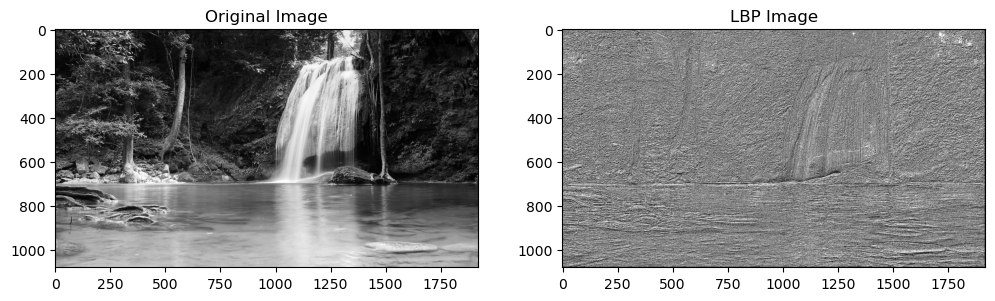

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def lbp(image):
    rows, cols = image.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows-1):
        for j in range(1, cols-1):
            center = image[i, j]
            binary_string = ''
            binary_string += '1' if image[i-1, j-1] >= center else '0'
            binary_string += '1' if image[i-1, j] >= center else '0'
            binary_string += '1' if image[i-1, j+1] >= center else '0'
            binary_string += '1' if image[i, j+1] >= center else '0'
            binary_string += '1' if image[i+1, j+1] >= center else '0'
            binary_string += '1' if image[i+1, j] >= center else '0'
            binary_string += '1' if image[i+1, j-1] >= center else '0'
            binary_string += '1' if image[i, j-1] >= center else '0'
            lbp_value = int(binary_string, 2)
            lbp_image[i, j] = lbp_value

    return lbp_image

# Load a sample image
image = cv2.imread('My.jpg', cv2.IMREAD_GRAYSCALE)

# Compute LBP
lbp_image = lbp(image)

# Display the original and LBP images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('LBP Image')
plt.imshow(lbp_image, cmap='gray')
plt.show()

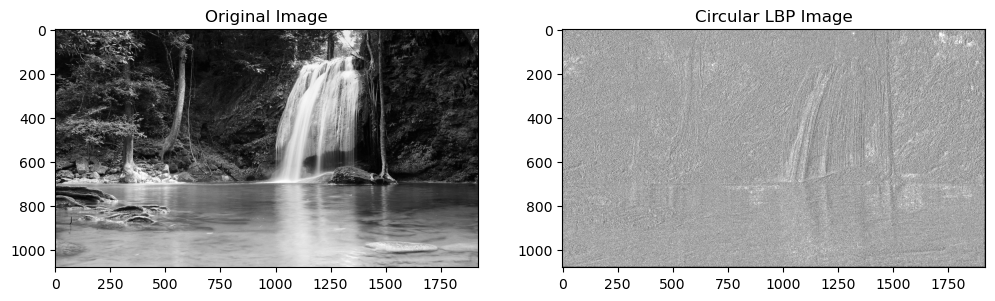

In [2]:
def get_pixel_value(image, center, x, y):
    try:
        return image[x, y]
    except IndexError:
        return center

def circular_lbp(image, radius=1, neighbors=8):
    rows, cols = image.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(radius, rows-radius):
        for j in range(radius, cols-radius):
            center = image[i, j]
            binary_string = ''
            for p in range(neighbors):
                angle = 2 * np.pi * p / neighbors
                x = i + radius * np.sin(angle)
                y = j + radius * np.cos(angle)
                neighbor_value = get_pixel_value(image, center, int(x), int(y))
                binary_string += '1' if neighbor_value >= center else '0'
            lbp_value = int(binary_string, 2)
            lbp_image[i, j] = lbp_value

    return lbp_image

# Compute Circular LBP
circular_lbp_image = circular_lbp(image, radius=1, neighbors=8)

# Display the original and Circular LBP images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Circular LBP Image')
plt.imshow(circular_lbp_image, cmap='gray')
plt.show()


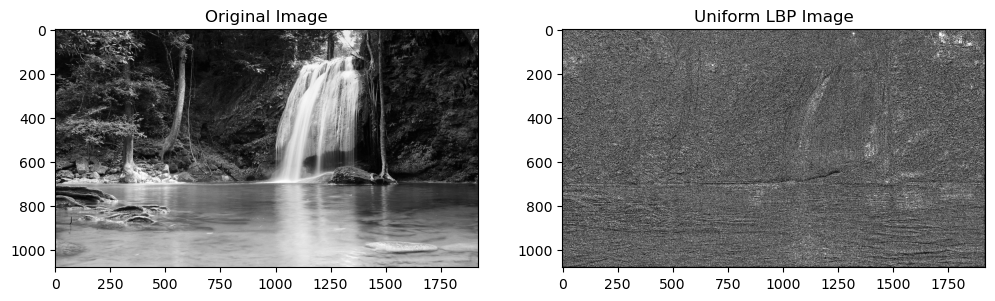

In [3]:
def is_uniform(pattern):
    transitions = sum((pattern[i] != pattern[i+1]) for i in range(len(pattern)-1)) + (pattern[0] != pattern[-1])
    return transitions <= 2

def uniform_lbp(image, radius=1, neighbors=8):
    rows, cols = image.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(radius, rows-radius):
        for j in range(radius, cols-radius):
            center = image[i, j]
            binary_pattern = []
            for p in range(neighbors):
                angle = 2 * np.pi * p / neighbors
                x = i + radius * np.sin(angle)
                y = j + radius * np.cos(angle)
                neighbor_value = get_pixel_value(image, center, int(x), int(y))
                binary_pattern.append(1 if neighbor_value >= center else 0)

            if is_uniform(binary_pattern):
                lbp_value = sum(val * (2 ** idx) for idx, val in enumerate(binary_pattern))
            else:
                lbp_value = neighbors + 1  # Assign a value for non-uniform patterns

            lbp_image[i, j] = lbp_value

    return lbp_image

# Compute Uniform LBP
uniform_lbp_image = uniform_lbp(image, radius=1, neighbors=8)

# Display the original and Uniform LBP images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Uniform LBP Image')
plt.imshow(uniform_lbp_image, cmap='gray')
plt.show()
